#Importing Libreries

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
df = pd.read_excel('student_depression_dataset1.csv.xlsx')

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1,No,1
1,8,Female,24,Bangalore,Student,2.0,0.0,5.90,5.0,0,'5-6 hours',Moderate,BSc,No,3.0,2,Yes,0
2,26,Male,31,Srinagar,Student,3.0,0.0,7.03,5.0,0,'Less than 5 hours',Healthy,BA,No,9.0,1,Yes,0
3,30,Female,28,Varanasi,Student,3.0,0.0,5.59,2.0,0,'7-8 hours',Moderate,BCA,NaN,4.0,5,Yes,1
4,32,Female,25,Jaipur,Student,4.0,0.0,8.13,3.0,0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1,No,0


In [ ]:
 df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27,Surat,Student,5.0,0.0,5.75,5.0,0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1,Yes,0
27897,140686,Male,27,Ludhiana,Student,2.0,0.0,9.40,3.0,0,'Less than 5 hours',Healthy,MSc,No,0.0,3,Yes,0
27898,140689,Male,31,Faridabad,Student,3.0,0.0,6.61,4.0,0,'5-6 hours',Unhealthy,MD,No,12.0,2,No,0
27899,140690,Female,18,Ludhiana,Student,5.0,0.0,6.88,2.0,0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5,No,1
27900,140699,Male,27,Patna,Student,4.0,0.0,9.24,1.0,0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3,Yes,1


In [ ]:
df.shape

(27901, 18)

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,22
Work Pressure,4
CGPA,2
Study Satisfaction,5
Job Satisfaction,0


In [ ]:
df['Academic Pressure'].fillna(df['Academic Pressure'].mean(), inplace=True)
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')
df['Financial Stress'].fillna(df['Financial Stress'].mean(), inplace=True)
df['Job Satisfaction'].fillna(df['Job Satisfaction'].mean(), inplace=True)
df['Work Pressure'].fillna(df['Work Pressure'].mean(), inplace=True)
df['Work/Study Hours'].fillna(df['Work/Study Hours'].mean(), inplace=True)
df['Study Satisfaction'].fillna(df['Study Satisfaction'].mean(), inplace=True)
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df['Have you ever had suicidal thoughts ?'].fillna(df['Have you ever had suicidal thoughts ?'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df['Work Pressure'].max(axis=0)

5.0

In [ ]:
df['Job Satisfaction'].max(axis=0)

4

In [ ]:
df['Academic Pressure'].max(axis=0)

5.0

In [ ]:
df['Work/Study Hours'].max(axis=0)

12.0

In [ ]:
df['Financial Stress'].axis=0

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141325,0.000430,7.656069,2.943899,0.000681,0.632783,7.156307,3.139815,0.585499
std,40641.175216,4.905687,1.380966,0.043992,1.470657,1.361072,0.044394,0.482038,3.706281,1.437151,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,1.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,1.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,1.000000,12.000000,5.000000,1.000000


In [ ]:
df.shape

(27901, 18)

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df['Academic Pressure'].fillna(df['Academic Pressure'].mean(), inplace=True)
df['Work/Study Hours'].fillna(df['Work/Study Hours'].mean(), inplace=True)
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)
df['Study Satisfaction'].fillna(df['Study Satisfaction'].mean(), inplace=True)

df['Financial Stress'].replace('?', np.nan, inplace=True)
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)

mode_value = df['Have you ever had suicidal thoughts ?'].mode()[0]
df['Have you ever had suicidal thoughts ?'].fillna(mode_value, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141325,1.380966,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656069,1.470657,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943899,1.361072,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Have you ever had suicidal thoughts ?,27901.0,0.632783,0.482038,0.0,0.00,1.00,1.00,1.0
Work/Study Hours,27901.0,7.156307,3.706281,0.0,4.00,8.00,10.00,12.0
Financial Stress,27901.0,3.139815,1.437151,1.0,2.00,3.00,4.00,5.0


In [ ]:
df.head(50)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5.000000,0.00000,8.97,2.000000,0,'5-6 hours',Healthy,B.Pharm,1.000000,3.000000,1.0,No,1
1,8,Female,24,Bangalore,Student,2.000000,0.00000,5.90,5.000000,0,'5-6 hours',Moderate,BSc,0.000000,3.000000,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3.000000,0.00000,7.03,5.000000,0,'Less than 5 hours',Healthy,BA,0.000000,9.000000,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3.000000,0.00000,5.59,2.000000,0,'7-8 hours',Moderate,BCA,0.632783,4.000000,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4.000000,0.00000,8.13,3.000000,0,'5-6 hours',Moderate,M.Tech,1.000000,1.000000,1.0,No,0
5,33,Male,29,Pune,Student,2.000000,0.00000,5.70,3.000000,0,'Less than 5 hours',Healthy,PhD,0.000000,4.000000,1.0,No,0
6,52,Male,30,Thane,Student,3.000000,0.00000,9.54,4.000000,0,'7-8 hours',Healthy,BSc,0.000000,1.000000,2.0,No,0
7,56,Female,30,Chennai,Student,2.000000,0.00000,8.04,4.000000,0,'Less than 5 hours',Unhealthy,'Class 12',0.000000,0.000000,1.0,Yes,0
8,59,Male,28,Nagpur,Student,3.000000,0.00000,9.79,1.000000,0,'7-8 hours',Moderate,B.Ed,1.000000,12.000000,3.0,No,1
9,62,Male,31,Nashik,Student,2.000000,0.00000,8.38,3.000000,0,'Less than 5 hours',Moderate,LLB,1.000000,2.000000,5.0,No,1


In [ ]:
df.describe(include=['object'])

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',No
freq,15547,1570,27870,8310,10317,6080,14398


<Axes: xlabel='Age'>

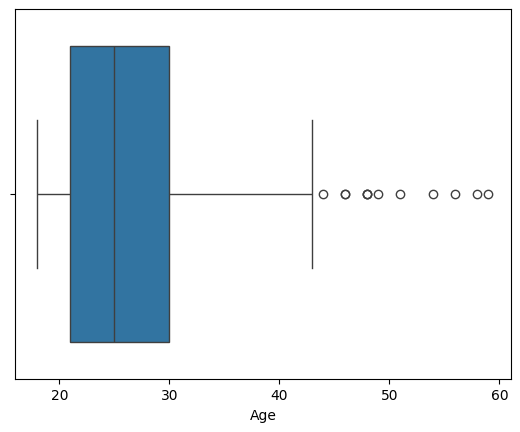

In [ ]:
sns.boxplot(x=df['Age'])

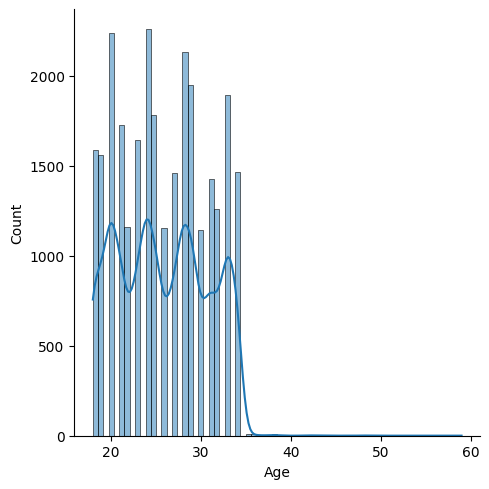

In [ ]:
sns.displot(x=df['Age'], kde=True)

<Axes: xlabel='Gender', ylabel='count'>

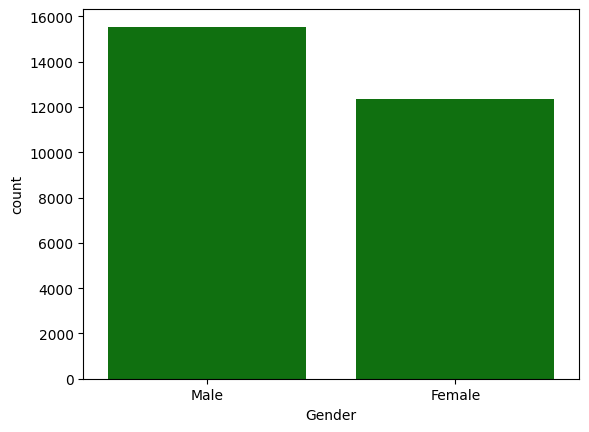

In [ ]:
sns.countplot(data=df, x='Gender', color='green')

<Axes: xlabel='Age'>

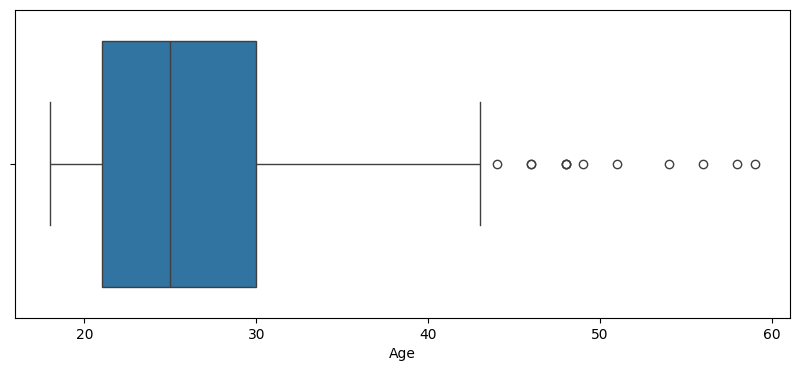

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Age')

<Axes: xlabel='City', ylabel='count'>

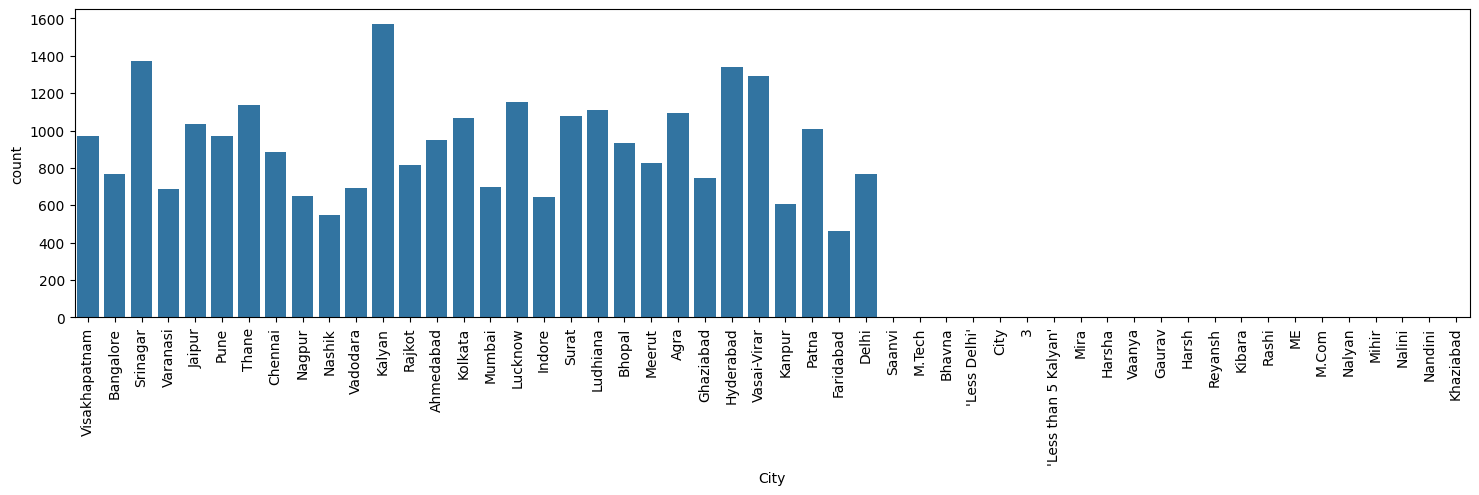

In [ ]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=90)
sns.countplot(data=df,x='City')

<Axes: xlabel='Profession', ylabel='count'>

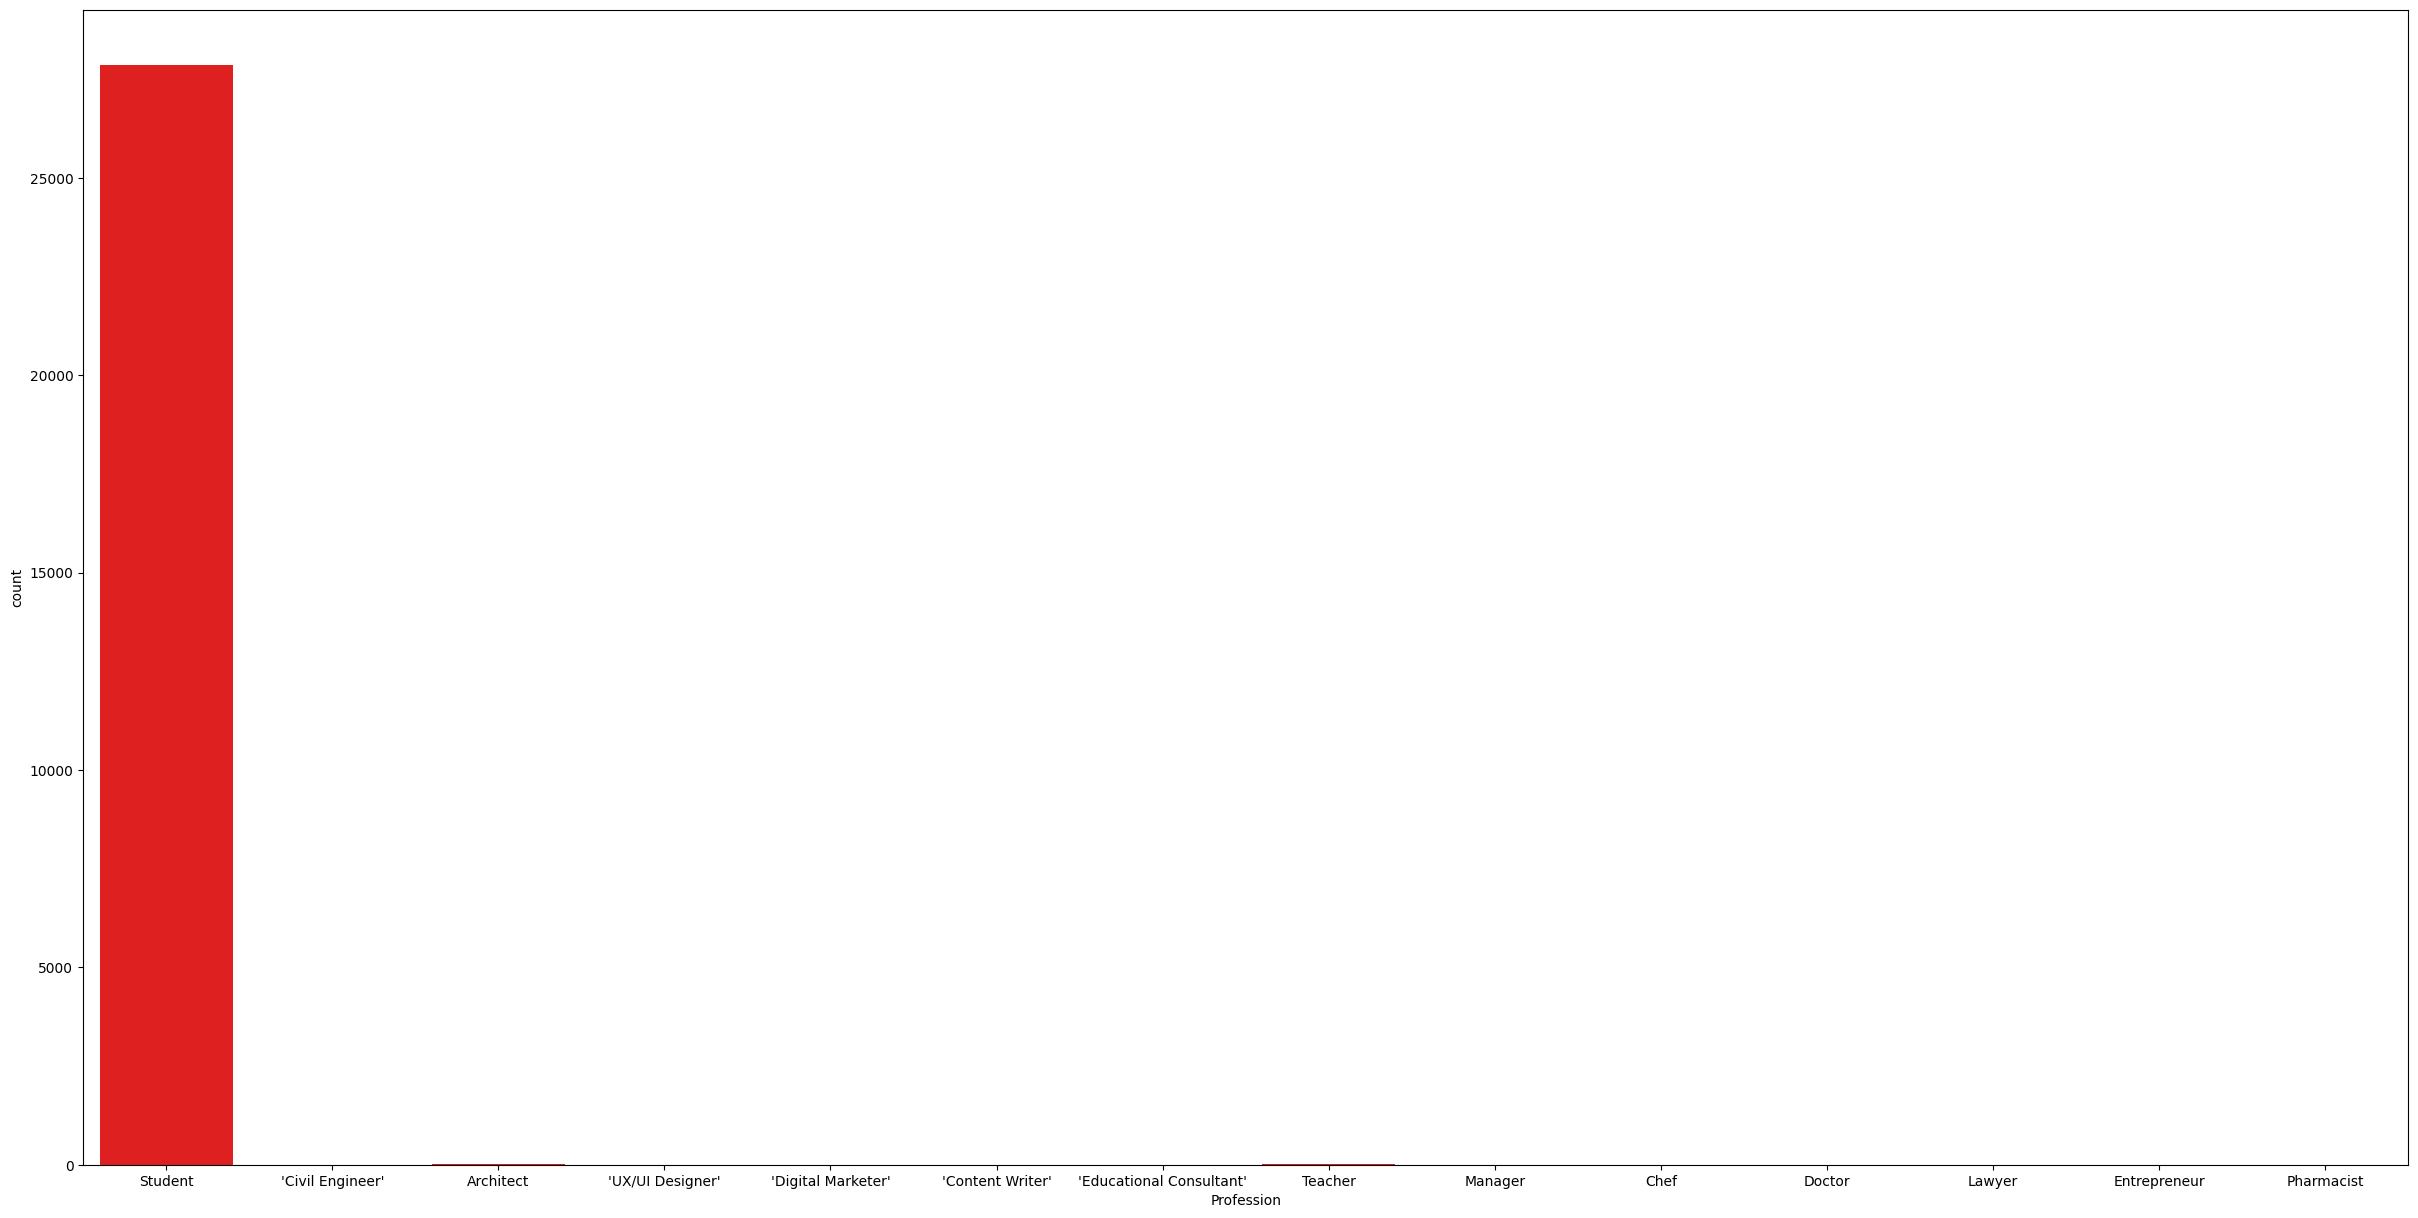

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data=df,x='Profession',color='red')

<Axes: xlabel='Academic Pressure'>

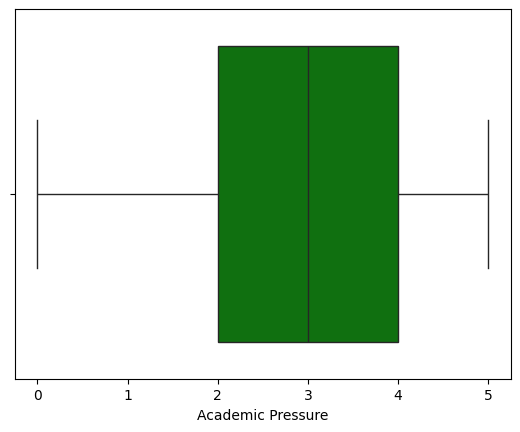

In [ ]:
sns.boxplot(data=df,x='Academic Pressure',color='green')

<Axes: xlabel='Work Pressure', ylabel='count'>

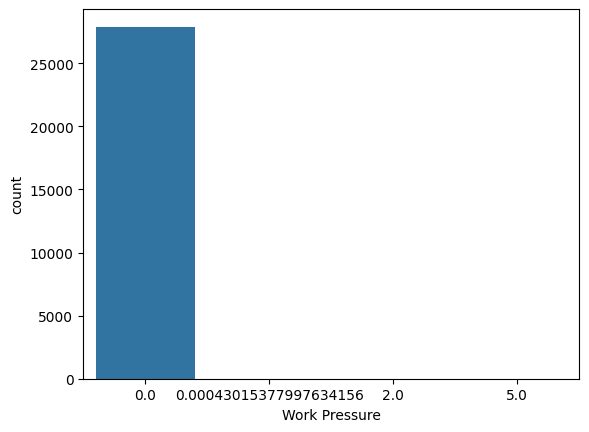

In [ ]:
sns.countplot(data=df,x='Work Pressure')

<Axes: xlabel='CGPA', ylabel='Count'>

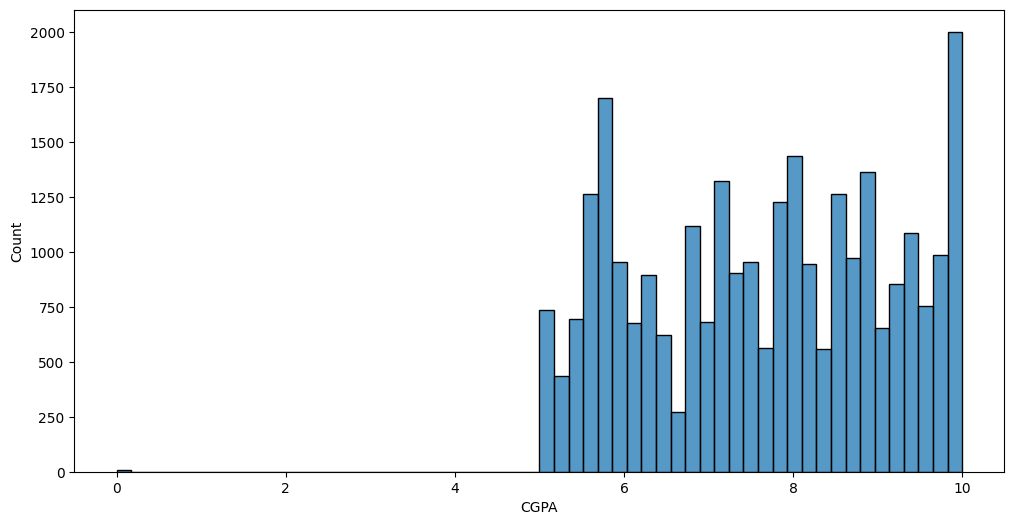

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='CGPA')

<Axes: xlabel='Study Satisfaction'>

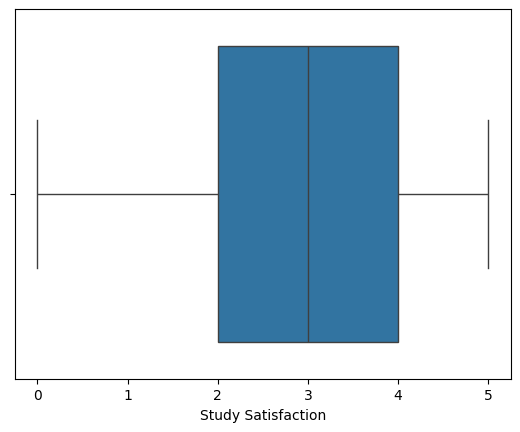

In [ ]:
sns.boxplot(data=df,x='Study Satisfaction')

<Axes: xlabel='Job Satisfaction', ylabel='Count'>

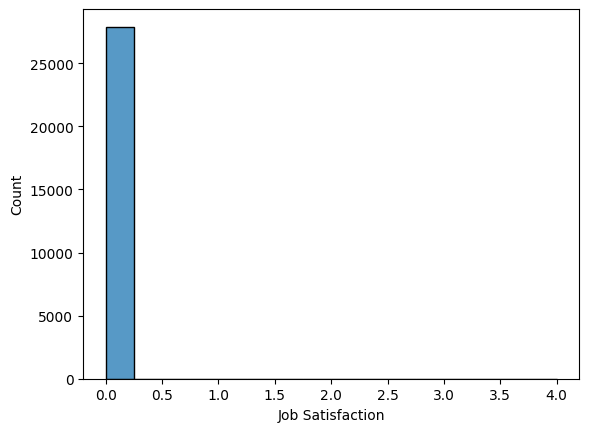

In [ ]:
sns.histplot(data=df,x='Job Satisfaction')

<Axes: xlabel='Sleep Duration', ylabel='count'>

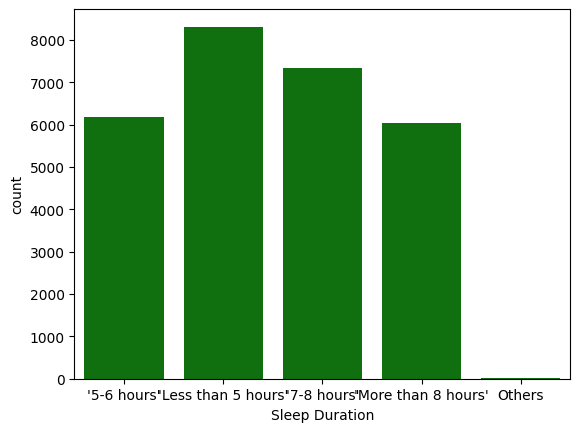

In [ ]:
sns.countplot(data=df,x='Sleep Duration',color='green')

<Axes: xlabel='Dietary Habits', ylabel='count'>

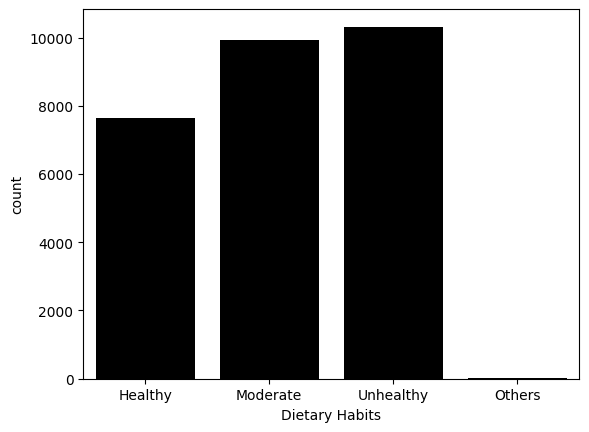

In [ ]:
sns.countplot(data=df,x='Dietary Habits',color='k')

<Axes: xlabel='Degree', ylabel='count'>

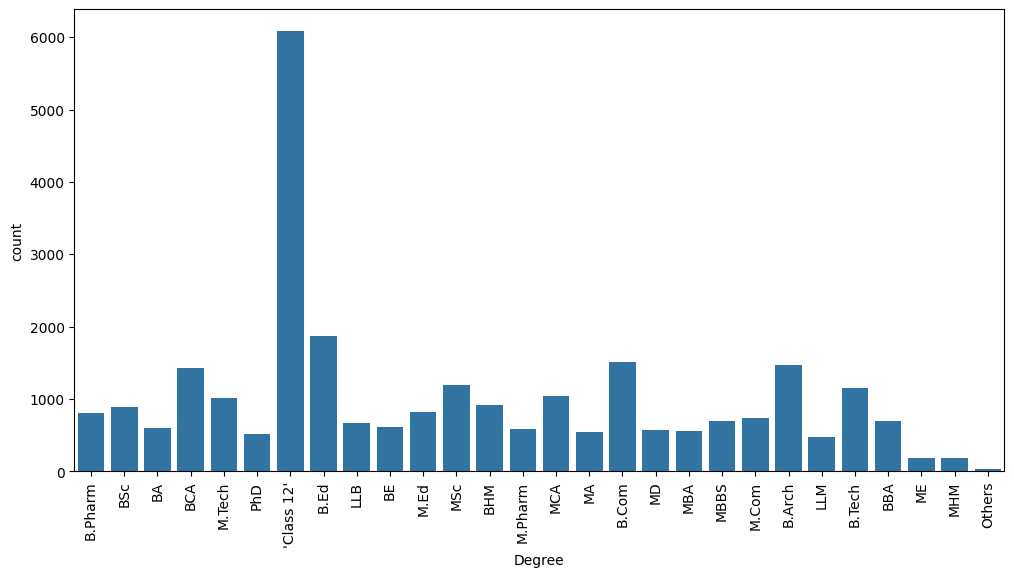

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data=df,x='Degree')

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

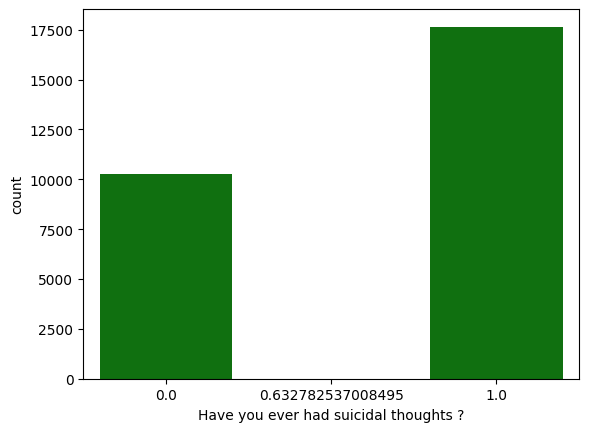

In [ ]:
sns.countplot(data=df,color='green',x='Have you ever had suicidal thoughts ?')

<Axes: xlabel='Work/Study Hours'>

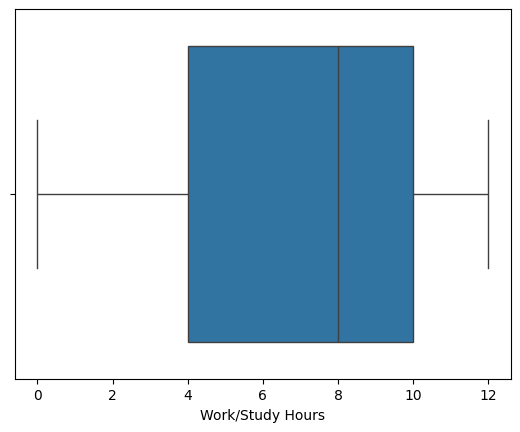

In [ ]:
sns.boxplot(data=df,x="Work/Study Hours")

<Axes: xlabel='Financial Stress'>

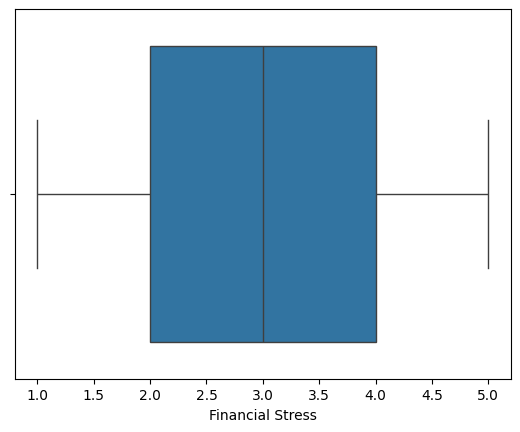

In [ ]:
sns.boxplot(data=df,x="Financial Stress")

<Axes: xlabel='Family History of Mental Illness', ylabel='Count'>

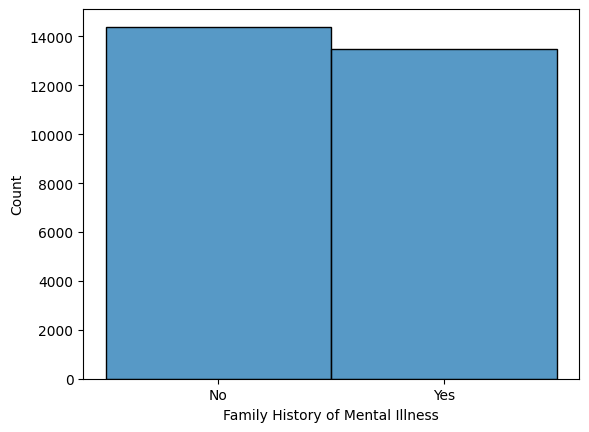

In [ ]:
sns.histplot(data=df,x='Family History of Mental Illness')

<Axes: xlabel='Depression', ylabel='count'>

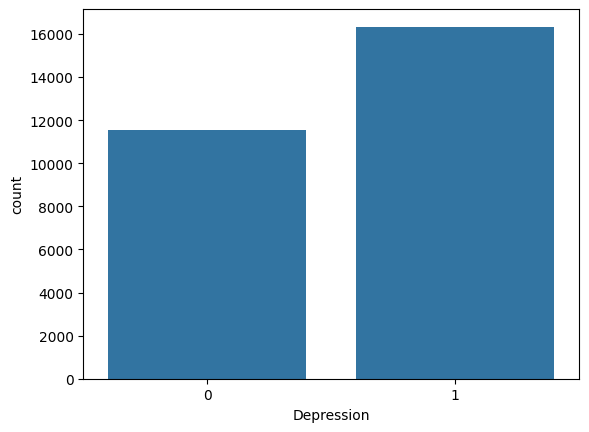

In [ ]:
sns.countplot(data=df,x='Depression')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
#Bivariant Analysis

<Axes: xlabel='Gender', ylabel='count'>

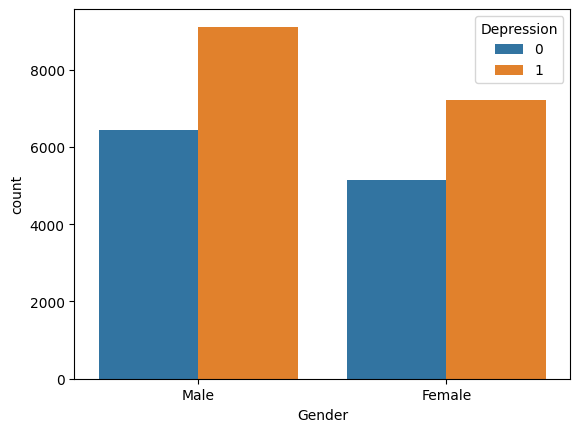

In [ ]:
sns.countplot(data=df,hue='Depression',x='Gender')

<Axes: xlabel='Age', ylabel='Depression'>

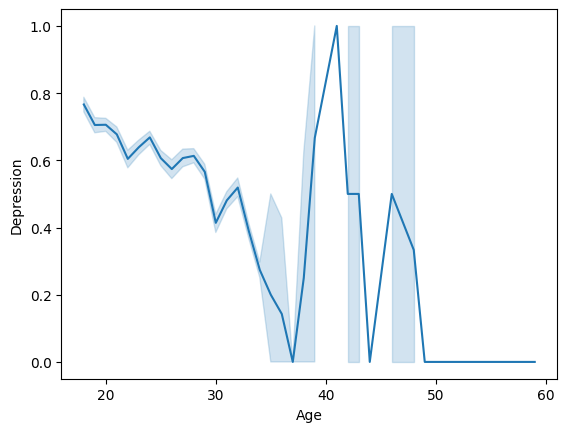

In [ ]:
sns.lineplot(data=df,x='Age',y='Depression')

<Axes: xlabel='City', ylabel='count'>

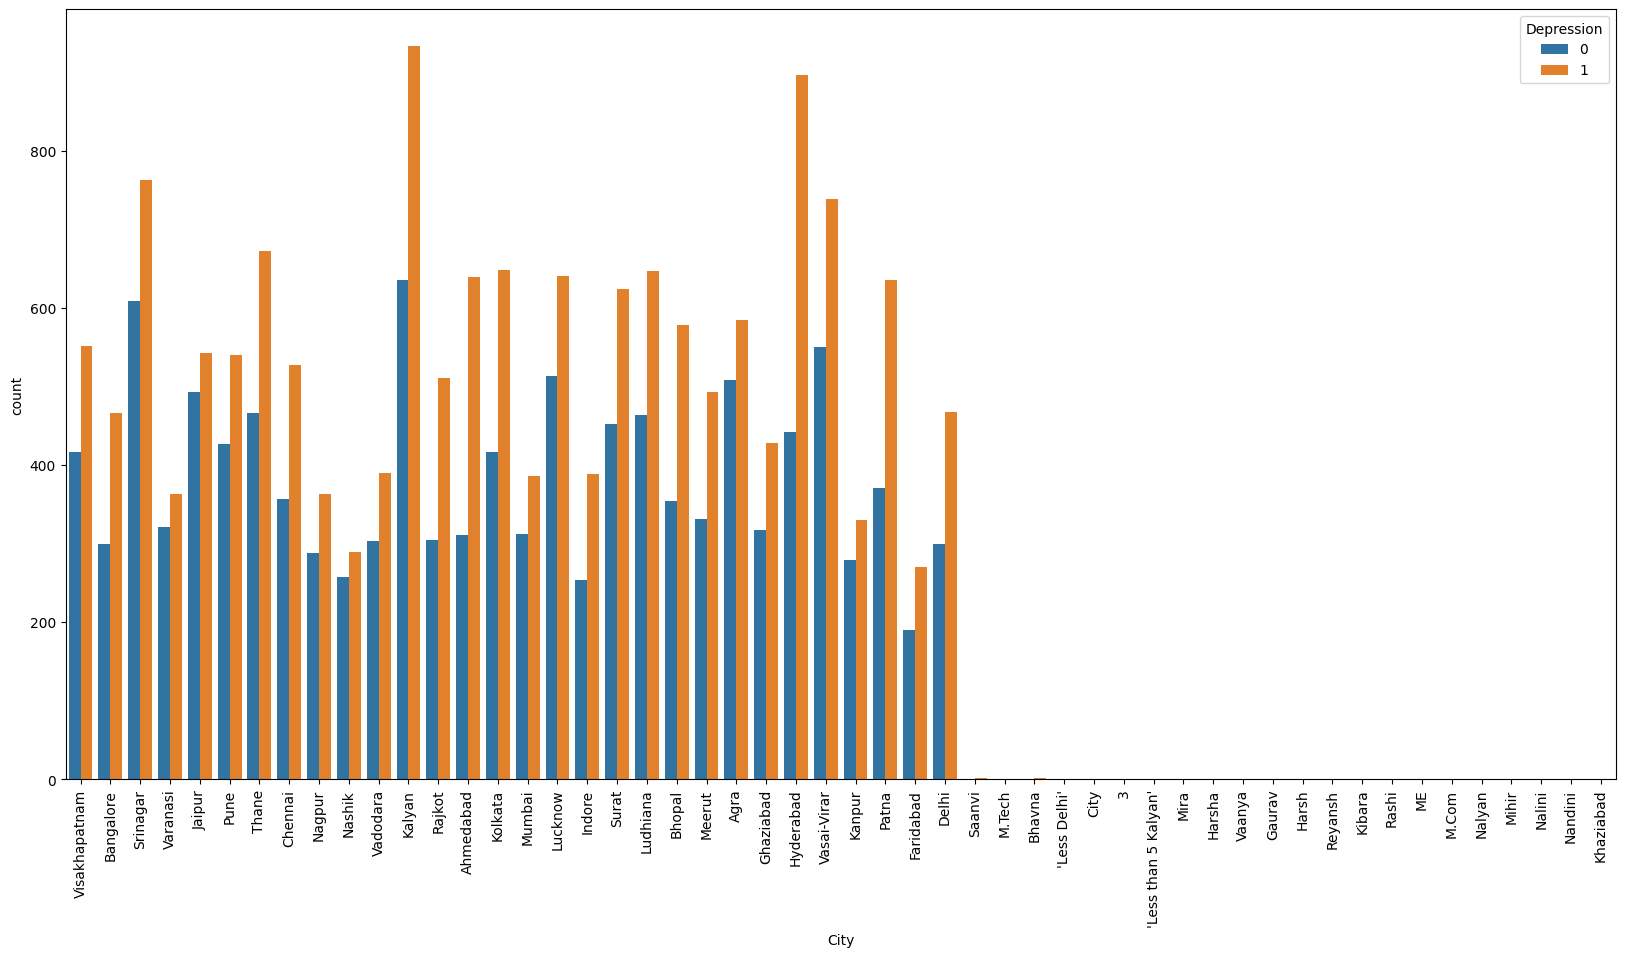

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data=df,hue='Depression',x='City',)

<Axes: xlabel='Profession', ylabel='Count'>

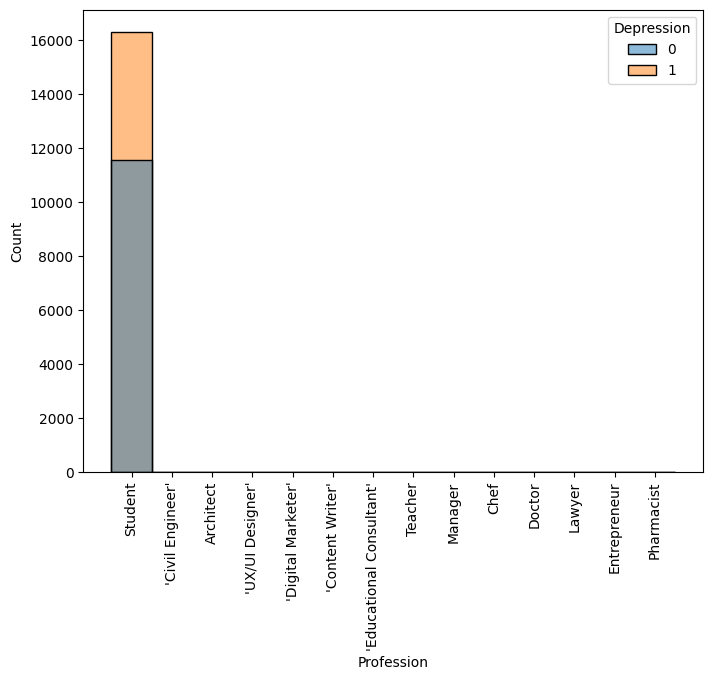

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.histplot(data=df,hue='Depression',x='Profession')

<Axes: >

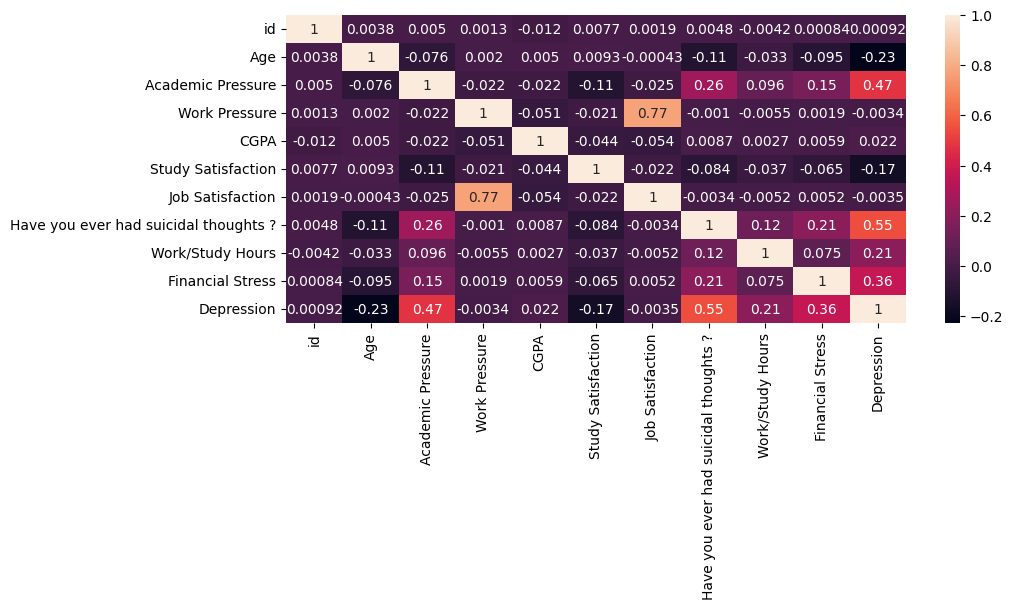

In [ ]:
plt.figure(figsize=(10,4))
numerical_student = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(data = numerical_student.corr(), annot = True)

In [ ]:
df['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [ ]:
df.groupby('Depression')['Profession'].value_counts(normalize = True).mul(100).rename('Percentage')

Depression  Profession              
0           Student                     99.974060
            'Digital Marketer'           0.008647
            Architect                    0.008647
            Teacher                      0.008647
1           Student                     99.828599
            Architect                    0.042850
            Teacher                      0.030607
            'Content Writer'             0.012243
            'Digital Marketer'           0.012243
            Chef                         0.012243
            Doctor                       0.012243
            Pharmacist                   0.012243
            'Civil Engineer'             0.006121
            'Educational Consultant'     0.006121
            'UX/UI Designer'             0.006121
            Entrepreneur                 0.006121
            Lawyer                       0.006121
            Manager                      0.006121
Name: Percentage, dtype: float64

<Axes: xlabel='Academic Pressure', ylabel='Depression'>

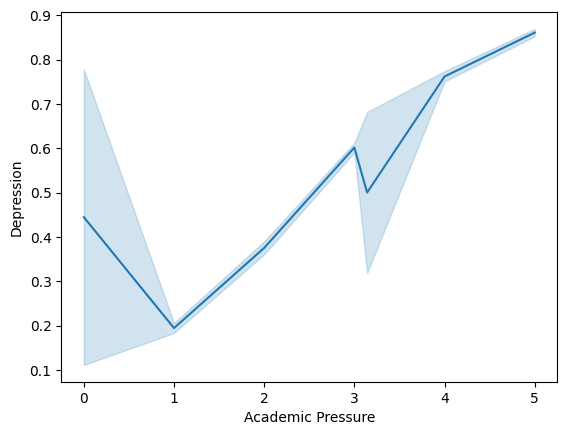

In [ ]:
sns.lineplot(data=df,y='Depression',x='Academic Pressure')

<Axes: xlabel='Work Pressure', ylabel='count'>

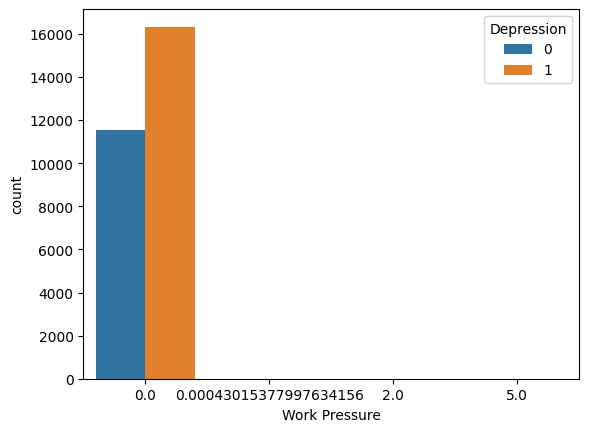

In [ ]:
sns.countplot(data=df, hue='Depression', x="Work Pressure")

<Axes: xlabel='Work Pressure', ylabel='Depression'>

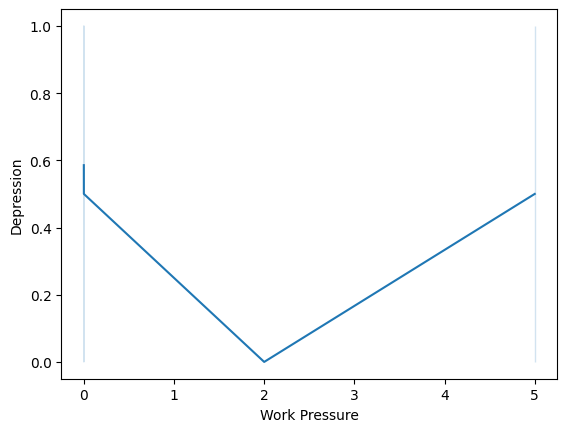

In [ ]:
sns.lineplot(data=df,y='Depression',x='Work Pressure')

<Axes: xlabel='CGPA', ylabel='Count'>

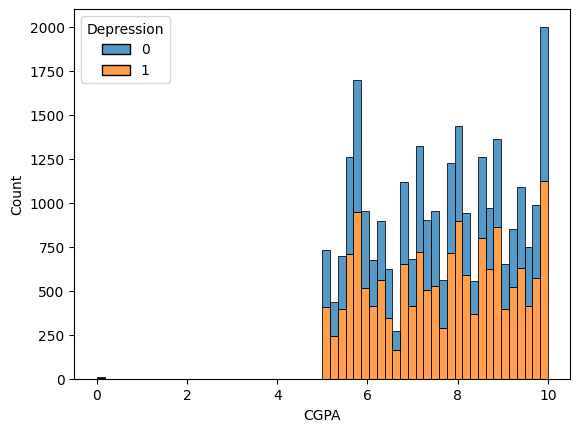

In [ ]:
sns.histplot(data=df, x="CGPA", hue="Depression", multiple="stack",color='k')

<Axes: xlabel='Study Satisfaction', ylabel='count'>

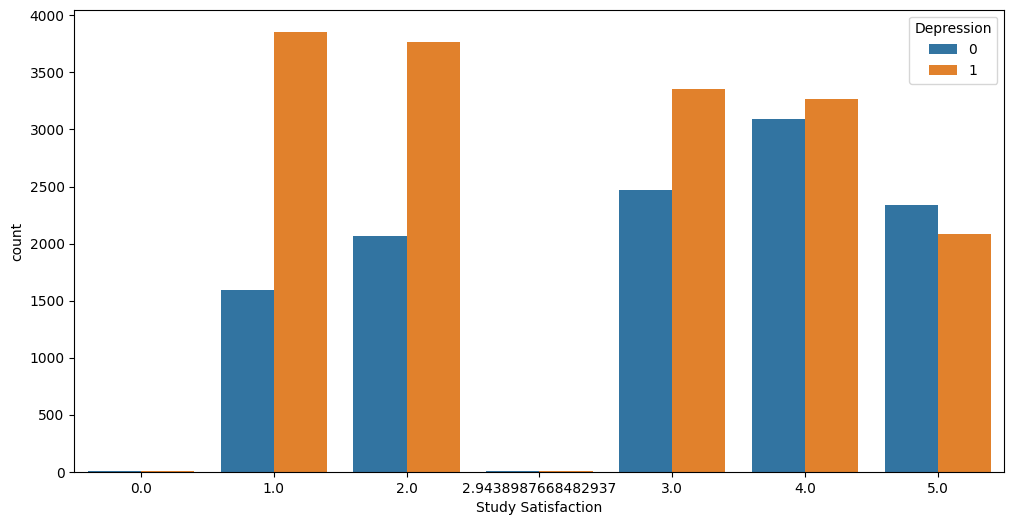

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,hue='Depression',x='Study Satisfaction')

<Axes: xlabel='Job Satisfaction', ylabel='count'>

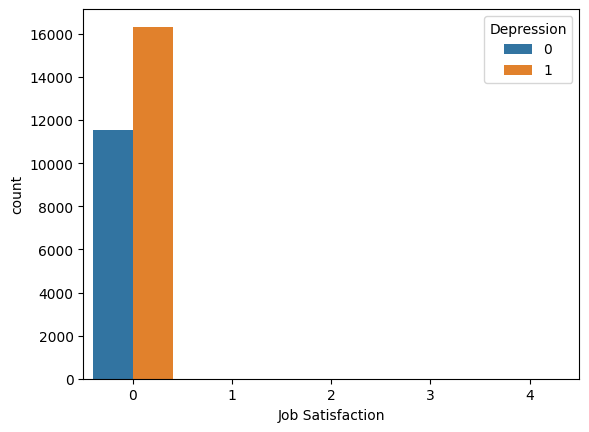

In [ ]:
sns.countplot(data=df, x="Job Satisfaction", hue="Depression")

<Axes: xlabel='Job Satisfaction', ylabel='Depression'>

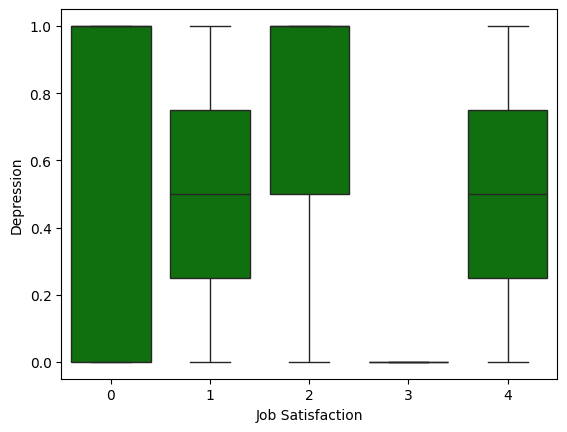

In [ ]:
sns.boxplot(data=df,y='Depression',x='Job Satisfaction',color='green')

<Axes: xlabel='Sleep Duration', ylabel='count'>

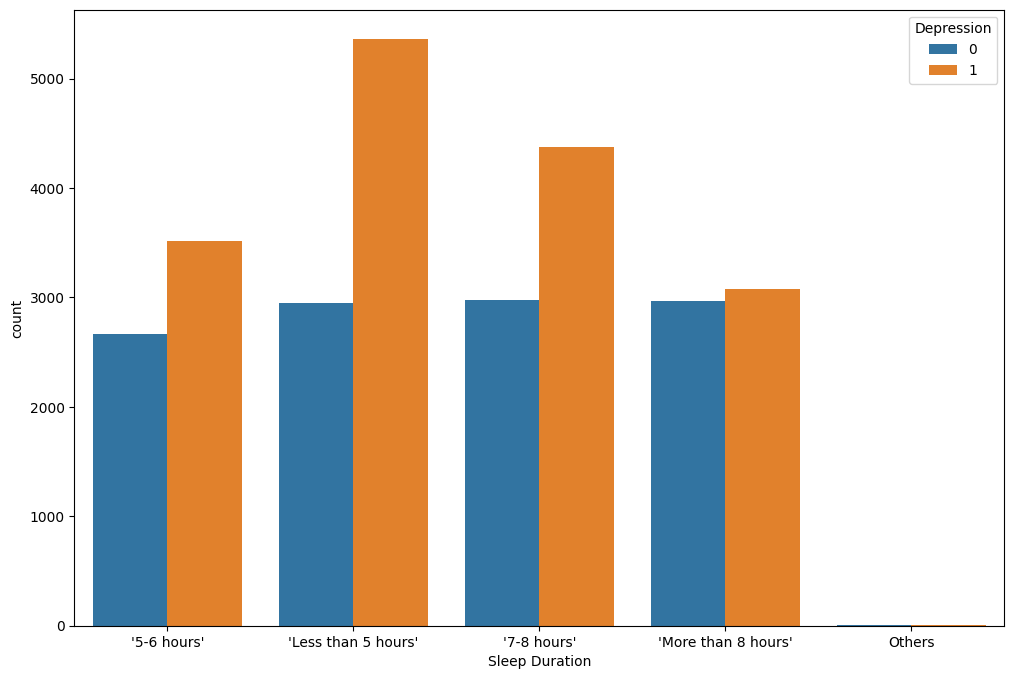

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,hue='Depression',x='Sleep Duration')

<Axes: xlabel='Depression', ylabel='count'>

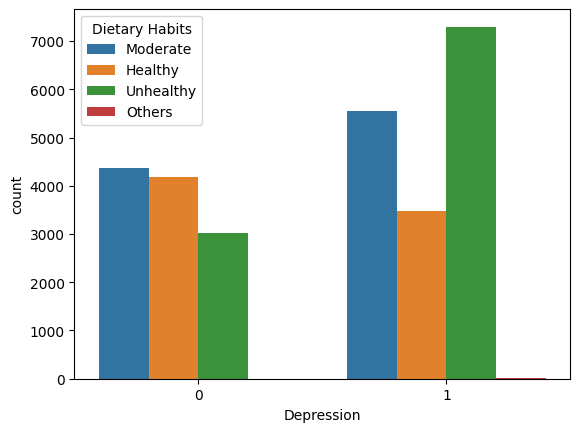

In [ ]:
sns.countplot(data=df,x='Depression',hue='Dietary Habits')

<Axes: xlabel='Degree', ylabel='Count'>

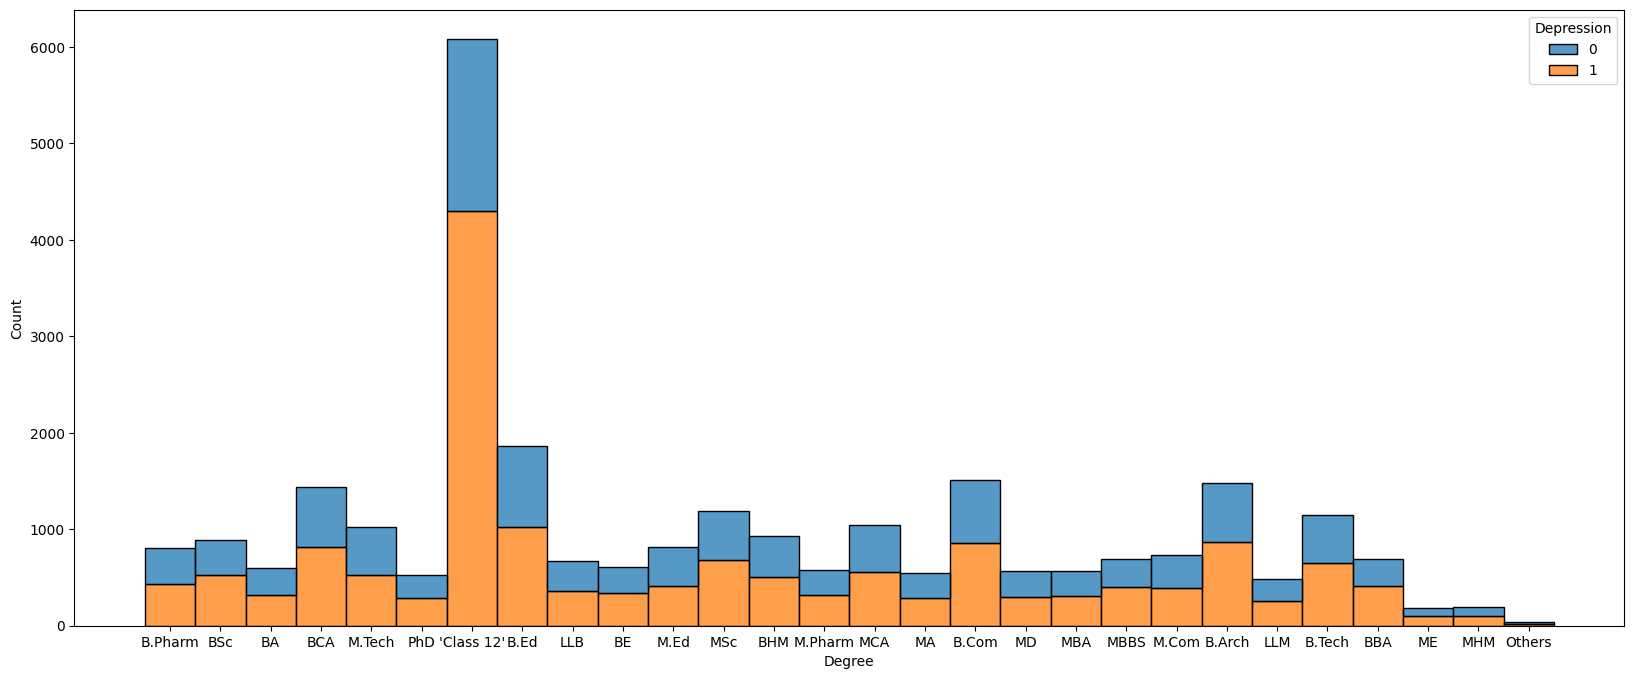

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=df, hue="Depression", x="Degree", multiple="stack")

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

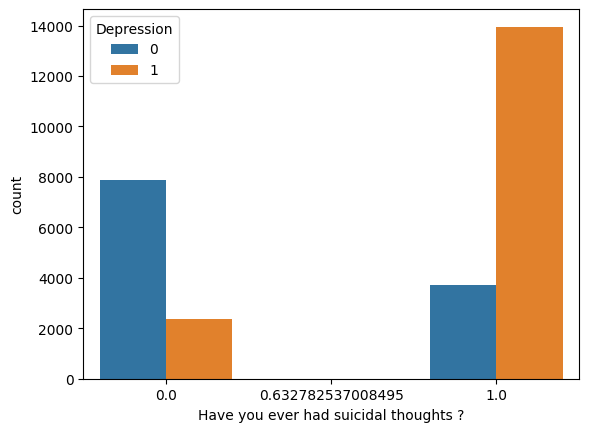

In [ ]:
sns.countplot(data=df, x="Have you ever had suicidal thoughts ?", hue="Depression")

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

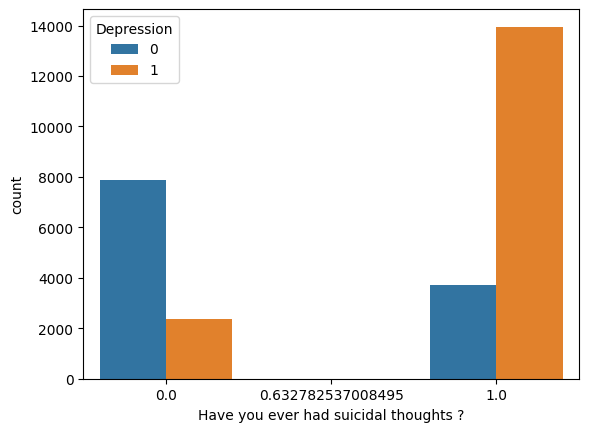

In [ ]:
sns.countplot(data=df,hue='Depression',x='Have you ever had suicidal thoughts ?')

<Axes: xlabel='Depression', ylabel='Work/Study Hours'>

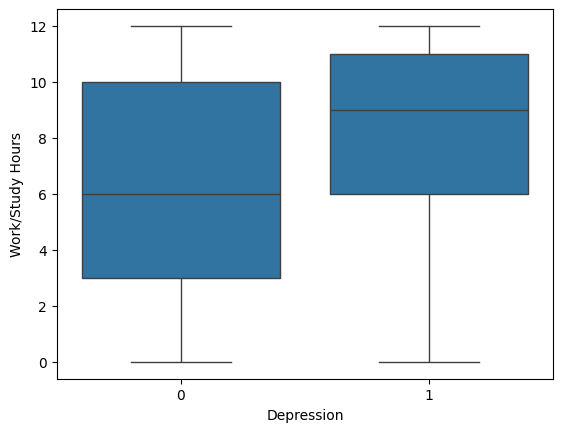

In [ ]:
sns.boxplot(data=df,x='Depression',y='Work/Study Hours')

<Axes: xlabel='Financial Stress', ylabel='Depression'>

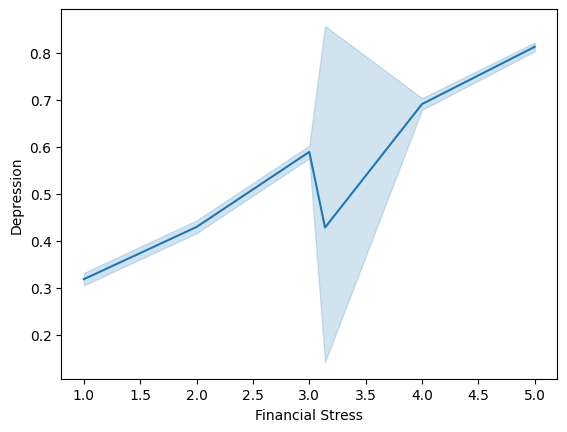

In [ ]:
sns.lineplot(data=df,y='Depression',x='Financial Stress')

<Axes: xlabel='Depression', ylabel='count'>

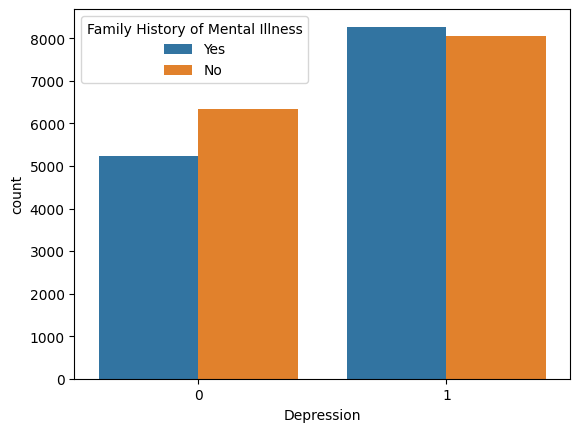

In [ ]:
sns.countplot(data=df, x="Depression", hue="Family History of Mental Illness")

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0,'5-6 hours',Healthy,B.Pharm,1.000000,3.0,1.0,No,1
1,8,Female,24,Bangalore,Student,2.0,0.0,5.90,5.0,0,'5-6 hours',Moderate,BSc,0.000000,3.0,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3.0,0.0,7.03,5.0,0,'Less than 5 hours',Healthy,BA,0.000000,9.0,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3.0,0.0,5.59,2.0,0,'7-8 hours',Moderate,BCA,0.632783,4.0,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4.0,0.0,8.13,3.0,0,'5-6 hours',Moderate,M.Tech,1.000000,1.0,1.0,No,0


In [ ]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=[np.number])

In [ ]:
df_num

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression
0,2,33,5.0,0.0,8.97,2.0,0,1.000000,3.0,1.0,1
1,8,24,2.0,0.0,5.90,5.0,0,0.000000,3.0,2.0,0
2,26,31,3.0,0.0,7.03,5.0,0,0.000000,9.0,1.0,0
3,30,28,3.0,0.0,5.59,2.0,0,0.632783,4.0,5.0,1
4,32,25,4.0,0.0,8.13,3.0,0,1.000000,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27,5.0,0.0,5.75,5.0,0,1.000000,7.0,1.0,0
27897,140686,27,2.0,0.0,9.40,3.0,0,0.000000,0.0,3.0,0
27898,140689,31,3.0,0.0,6.61,4.0,0,0.000000,12.0,2.0,0
27899,140690,18,5.0,0.0,6.88,2.0,0,1.000000,10.0,5.0,1


In [ ]:
df_cat

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Family History of Mental Illness
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,No
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,Yes
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,Yes
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,No
...,...,...,...,...,...,...,...
27896,Female,Surat,Student,'5-6 hours',Unhealthy,'Class 12',Yes
27897,Male,Ludhiana,Student,'Less than 5 hours',Healthy,MSc,Yes
27898,Male,Faridabad,Student,'5-6 hours',Unhealthy,MD,No
27899,Female,Ludhiana,Student,'Less than 5 hours',Healthy,'Class 12',No


In [ ]:
df_cat.columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Family History of Mental Illness'],
      dtype='object')

In [ ]:
warnings.filterwarnings("ignore")
df_cat['Gender']=pd.get_dummies(df_cat['Gender'],drop_first=True)

In [ ]:
cols=list(df_cat.columns)
def cat_2_num(cols):
    for col in cols:
        df_cat[col]=pd.get_dummies(df_cat[col],drop_first=True)

In [ ]:
df_cat.dtypes

,0
Gender,bool
City,object
Profession,object
Sleep Duration,object
Dietary Habits,object
Degree,object
Family History of Mental Illness,object


In [ ]:
df_ml=pd.concat([df_cat, df_num])

In [ ]:
df_ml.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141325,0.000430,7.656069,2.943899,0.000681,0.632783,7.156307,3.139815,0.585499
std,40641.175216,4.905687,1.380966,0.043992,1.470657,1.361072,0.044394,0.482038,3.706281,1.437151,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,1.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,1.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,1.000000,12.000000,5.000000,1.000000


In [ ]:
df_ml.columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Family History of Mental Illness', 'id', 'Age',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress', 'Depression'],
      dtype='object')

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

**Visualization (Demographics & Features)**

<Axes: xlabel='Age', ylabel='Count'>

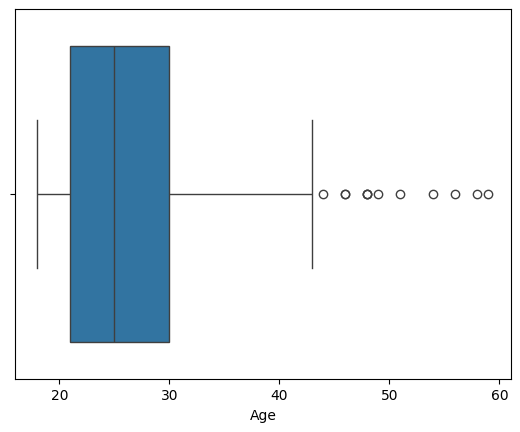

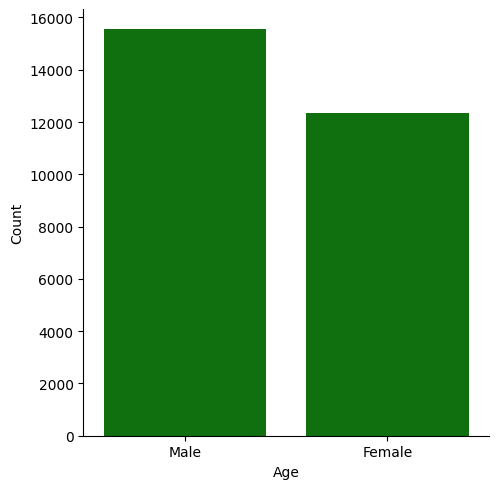

In [ ]:
sns.boxplot(x=df['Age'])
sns.displot(x=df['Age'], kde=True)
sns.countplot(data=df, x='Gender', color='green')

<Axes: xlabel='City', ylabel='count'>

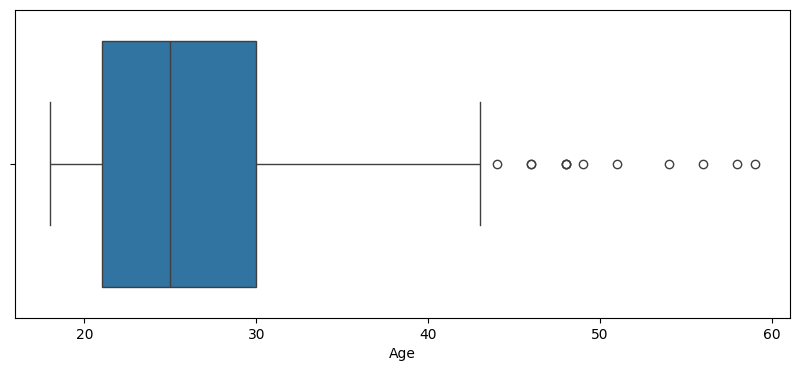

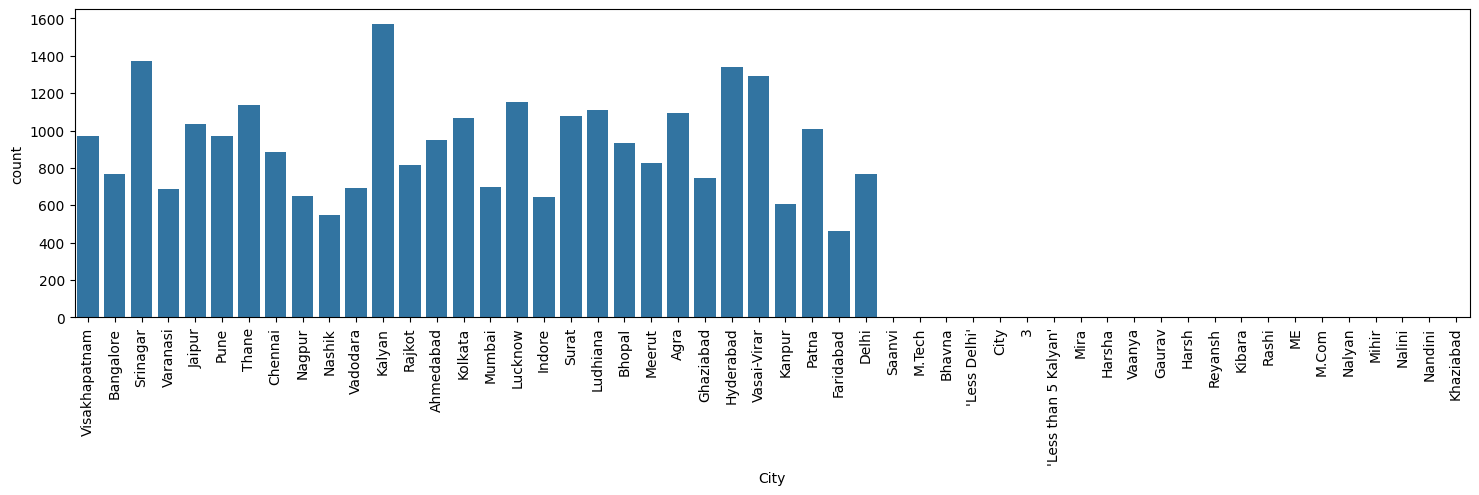

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Age')

plt.figure(figsize=(18,4))
plt.xticks(rotation=90)
sns.countplot(data=df,x='City')

**Correlation & Heatmap**

<Figure size 3000x2000 with 0 Axes>

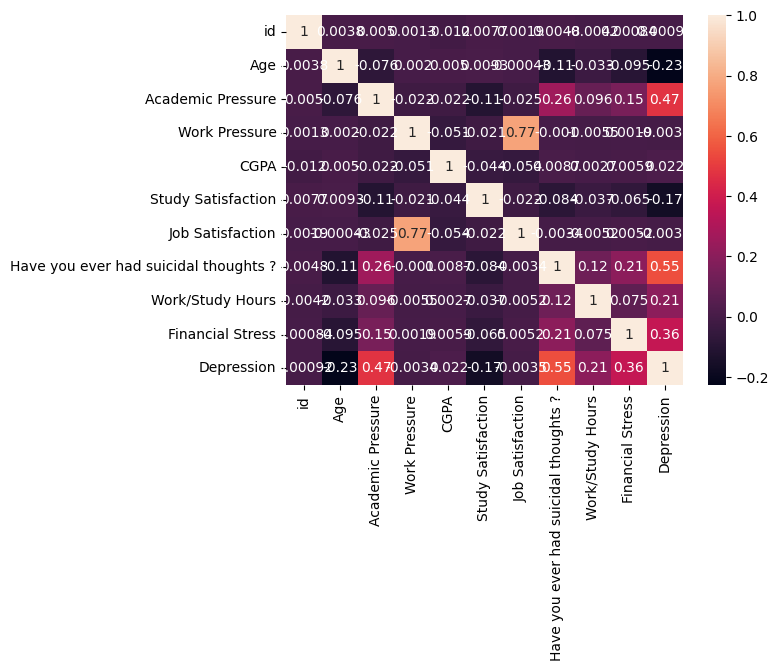

<Figure size 3000x2000 with 0 Axes>

In [ ]:
numerical_student = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(data=numerical_student.corr(), annot=True)
plt.figure(figsize=(30,20))

**Convert Categorical Columns**

In [ ]:
df_cat = df.select_dtypes(include=['object']).copy()
df_num = df.select_dtypes(include=[np.number]).copy()

import warnings
warnings.filterwarnings("ignore")

df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)

df_ml = pd.concat([df_cat_encoded, df_num], axis=1)


**Categorical into numaric**

In [ ]:
categorical_columns = [
    'Gender',
    'City',
    'Profession',
    'Sleep Duration',
    'Dietary Habits',
    'Degree',
    'Have you ever had suicidal thoughts ?',
    'Financial Stress',
    'Family History of Mental Illness'
]
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].fillna('Unknown')
df['Financial Stress'] = df['Financial Stress'].replace('?', 'Unknown').fillna('Unknown')
label_mappings = {}

for col in categorical_columns:
    unique_values = df[col].dropna().unique()
    mapping = {val: idx for idx, val in enumerate(unique_values)}
    label_mappings[col] = mapping
    df[f"{col}_encoded"] = df[col].map(mapping)
print(df[[f"{col}_encoded" for col in categorical_columns]].head())


   Gender_encoded  City_encoded  Profession_encoded  Sleep Duration_encoded  \
0               0             0                   0                       0   
1               1             1                   0                       0   
2               0             2                   0                       1   
3               1             3                   0                       2   
4               1             4                   0                       0   

   Dietary Habits_encoded  Degree_encoded  \
0                       0               0   
1                       1               1   
2                       0               2   
3                       1               3   
4                       1               4   

   Have you ever had suicidal thoughts ?_encoded  Financial Stress_encoded  \
0                                              0                         0   
1                                              1                         1   
2                   

In [ ]:
object_columns = df.select_dtypes(include='object').columns.tolist()
df['Financial Stress'] = df['Financial Stress'].replace('?', 'Unknown')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].fillna('Unknown')
df['Financial Stress'] = df['Financial Stress'].fillna('Unknown')
label_mappings = {}
for col in object_columns:
    unique_vals = df[col].dropna().unique()
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    df[col] = df[col].map(mapping)
    label_mappings[col] = mapping

print(df.head())

   id  Gender  Age  City  Profession  Academic Pressure  Work Pressure  CGPA  \
0   2       0   33     0           0                5.0            0.0  8.97   
1   8       1   24     1           0                2.0            0.0  5.90   
2  26       0   31     2           0                3.0            0.0  7.03   
3  30       1   28     3           0                3.0            0.0  5.59   
4  32       1   25     4           0                4.0            0.0  8.13   

   Study Satisfaction  Job Satisfaction  ...  Depression  Gender_encoded  \
0                 2.0                 0  ...           1               0   
1                 5.0                 0  ...           0               1   
2                 5.0                 0  ...           0               0   
3                 2.0                 0  ...           1               1   
4                 3.0                 0  ...           0               1   

   City_encoded  Profession_encoded  Sleep Duration_encoded  \

In [ ]:
print(df.dtypes)

id                                                 int64
Gender                                             int64
Age                                                int64
City                                               int64
Profession                                         int64
Academic Pressure                                float64
Work Pressure                                    float64
CGPA                                             float64
Study Satisfaction                               float64
Job Satisfaction                                   int64
Sleep Duration                                     int64
Dietary Habits                                     int64
Degree                                             int64
Have you ever had suicidal thoughts ?            float64
Work/Study Hours                                 float64
Financial Stress                                 float64
Family History of Mental Illness                   int64
Depression                     

Detect and minimize Outliers

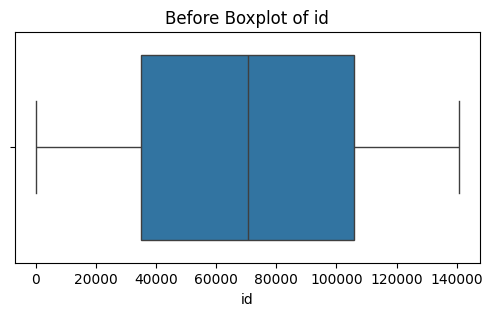

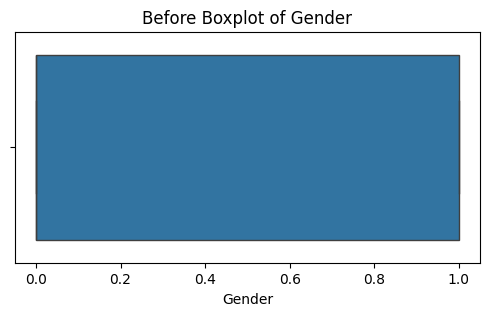

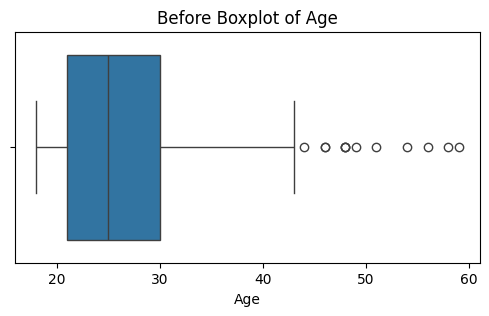

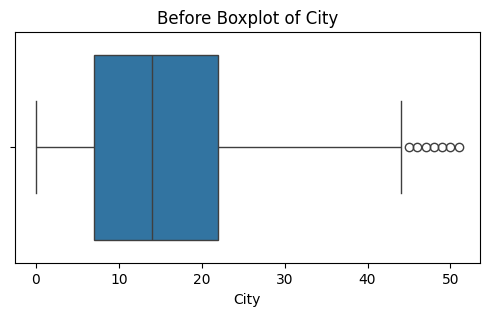

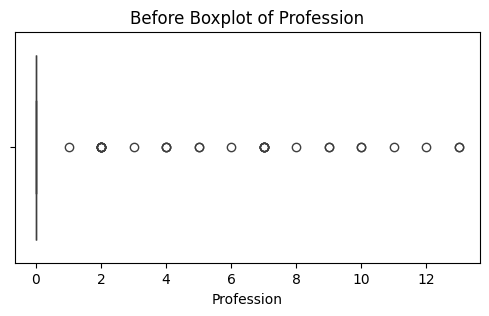

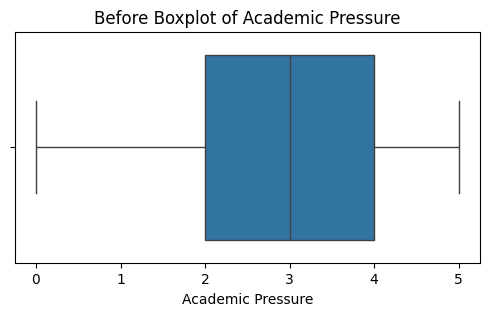

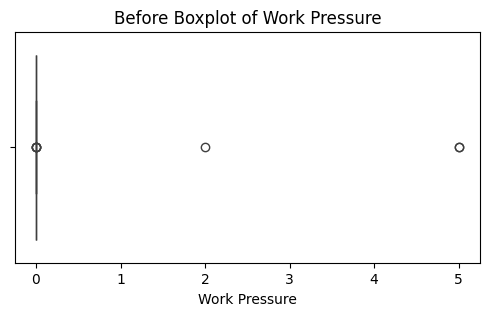

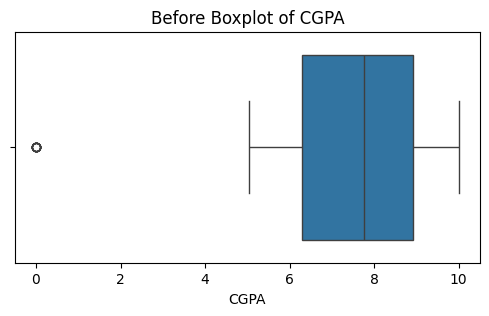

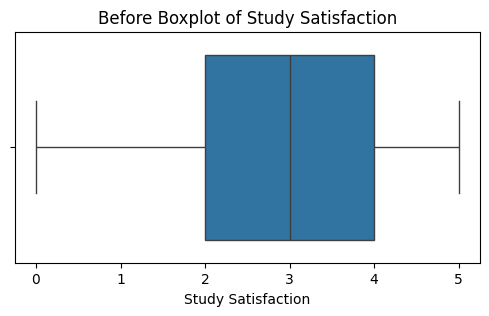

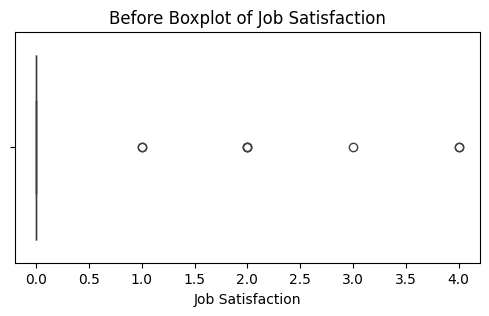

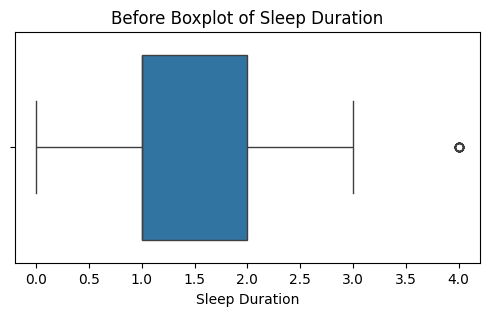

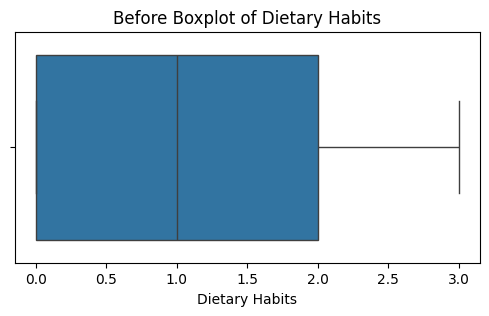

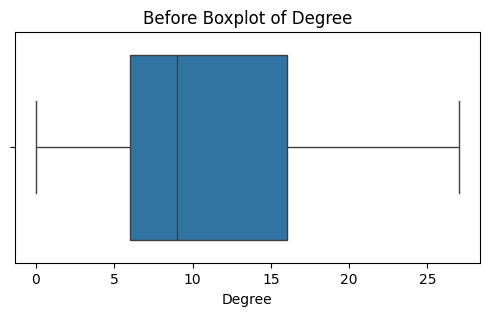

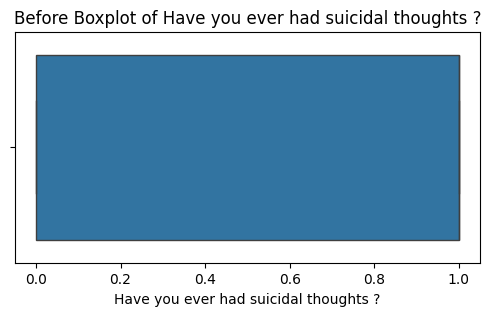

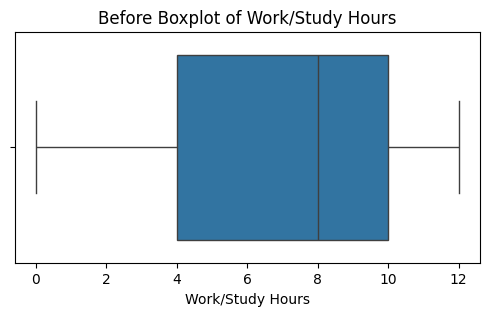

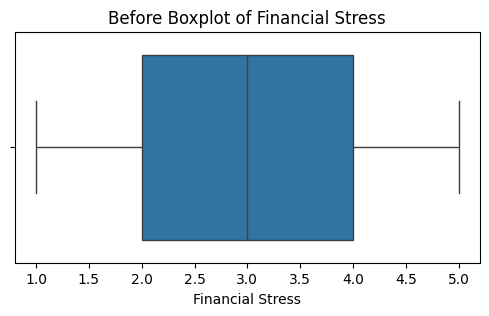

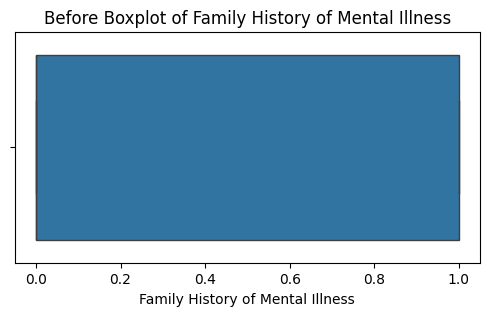

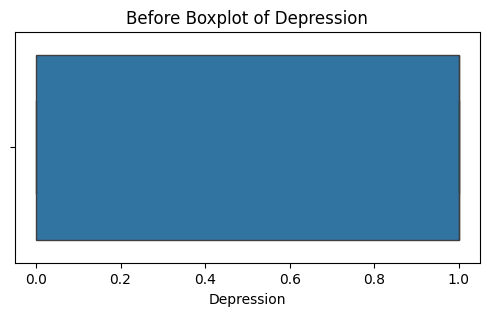

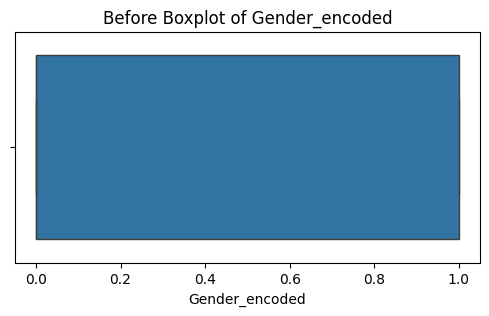

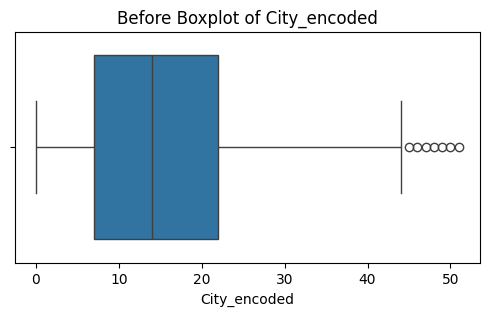

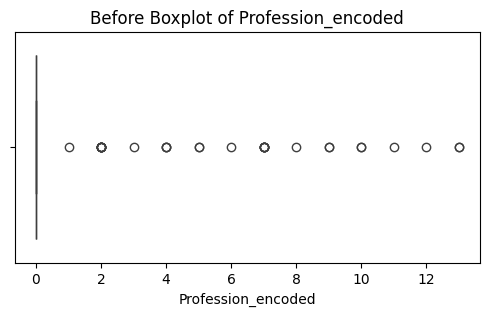

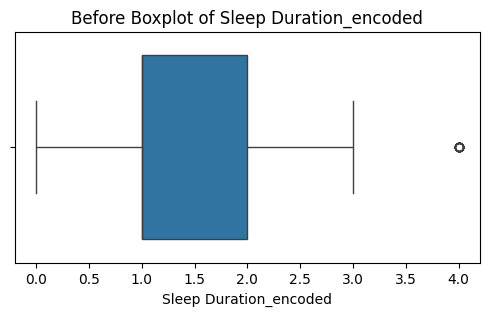

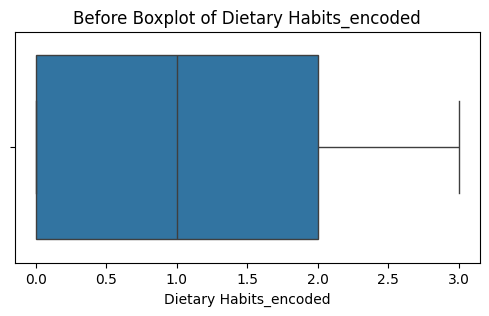

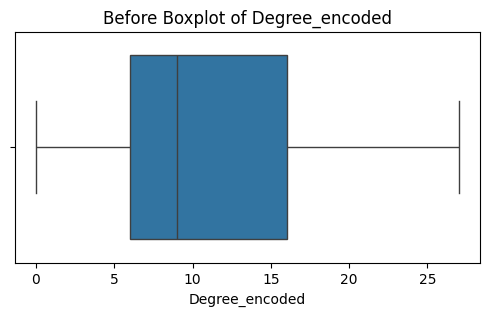

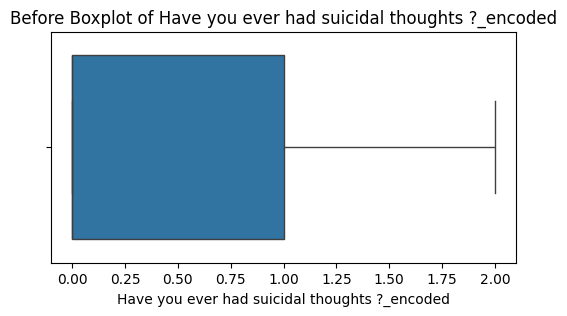

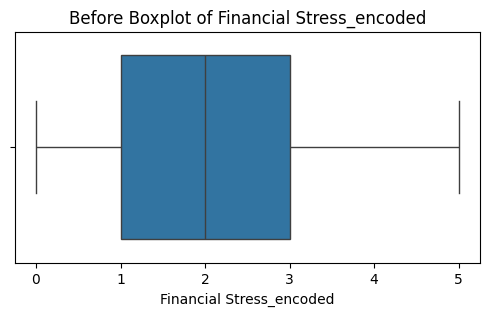

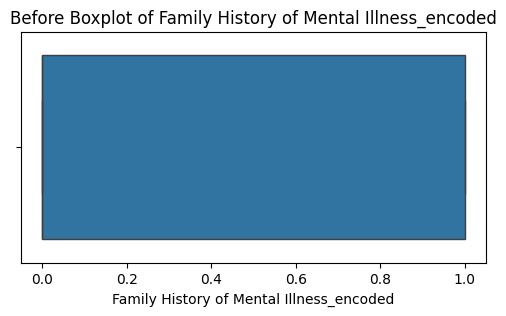

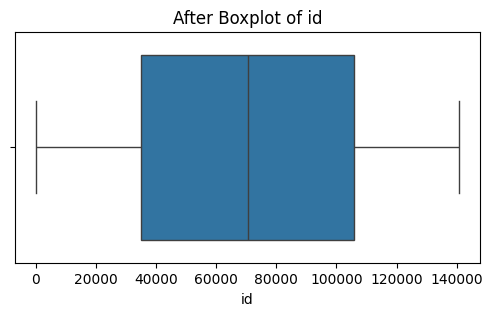

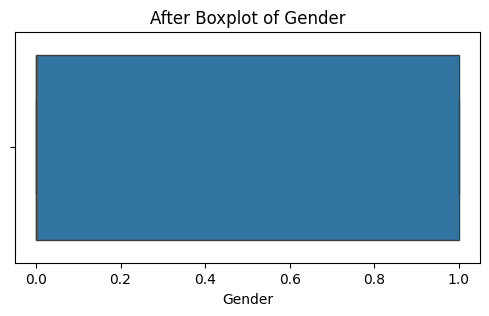

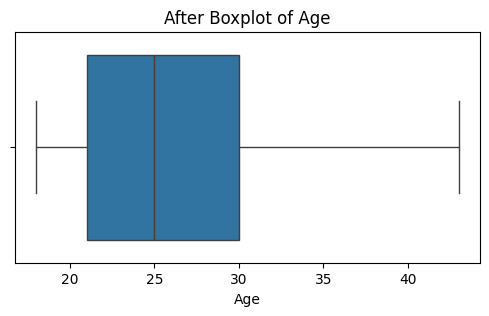

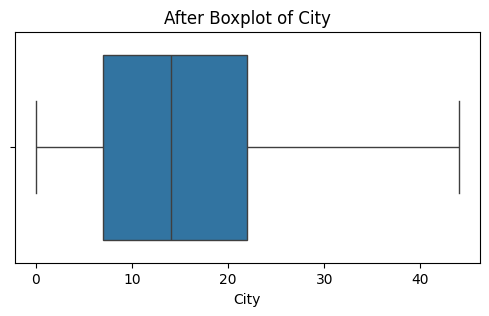

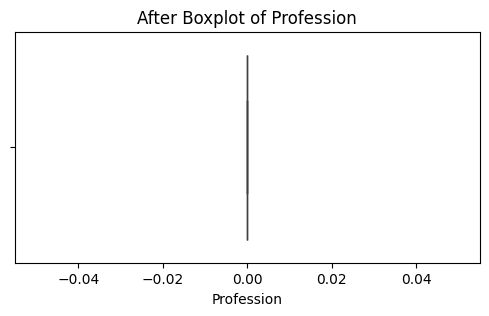

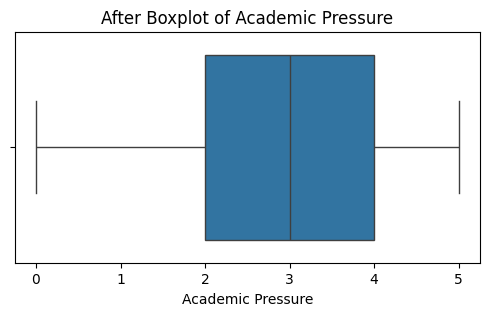

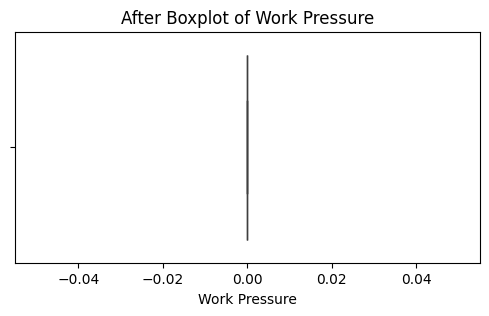

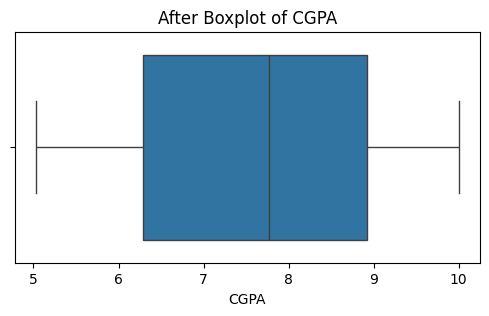

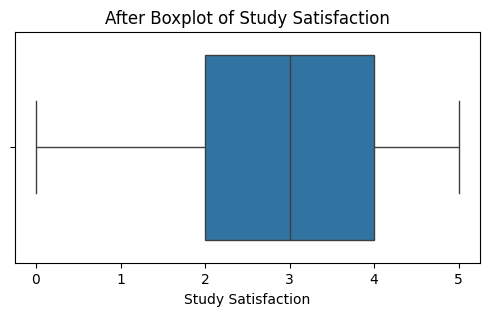

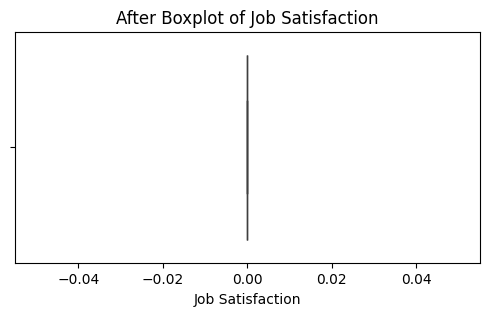

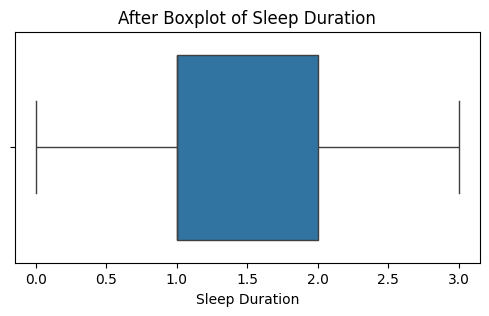

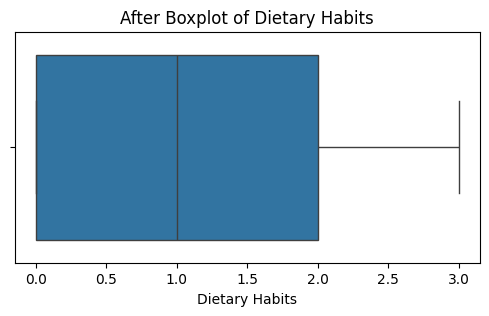

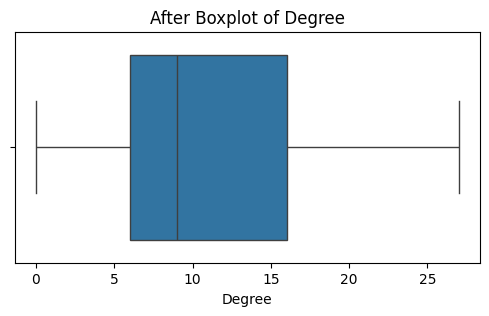

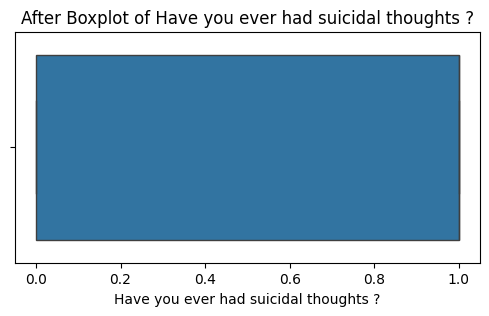

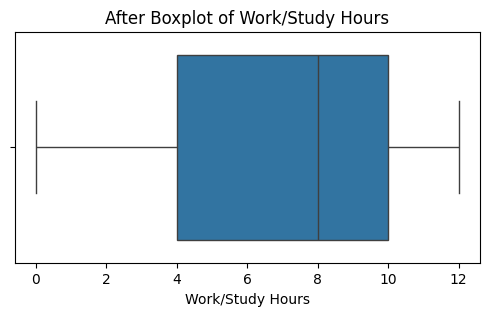

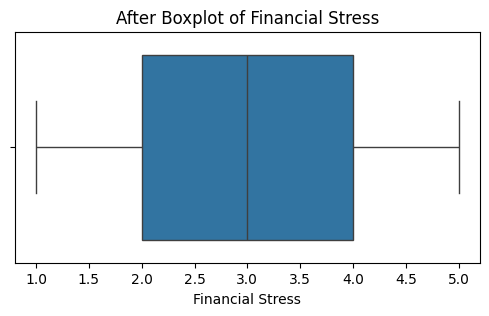

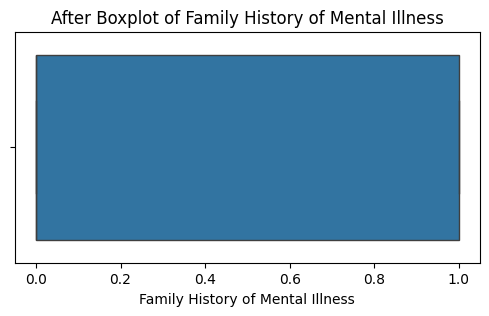

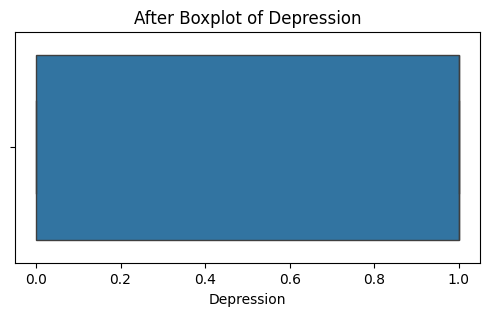

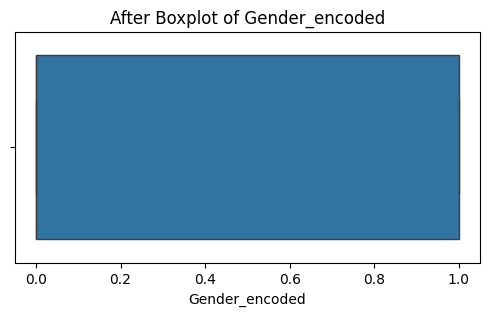

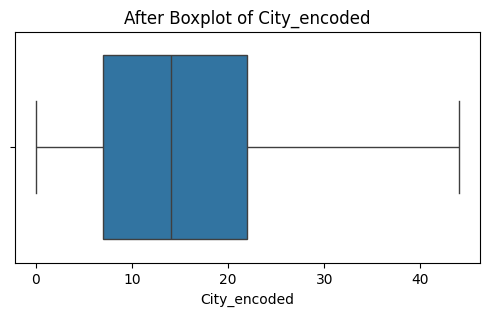

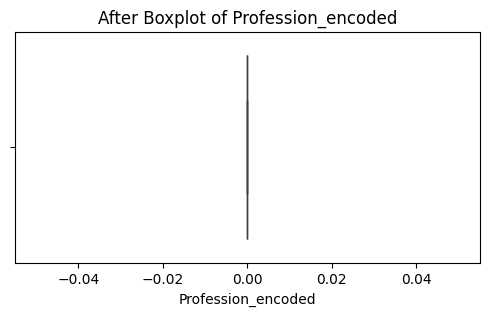

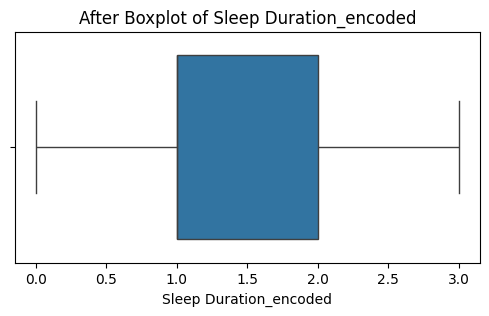

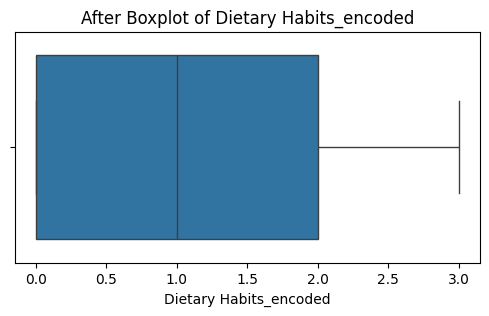

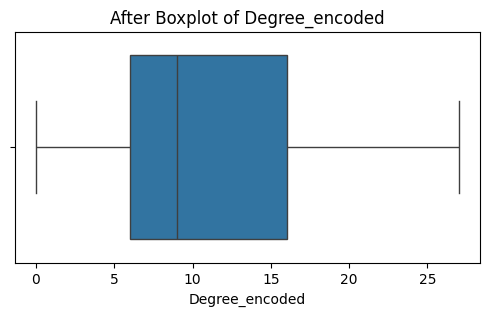

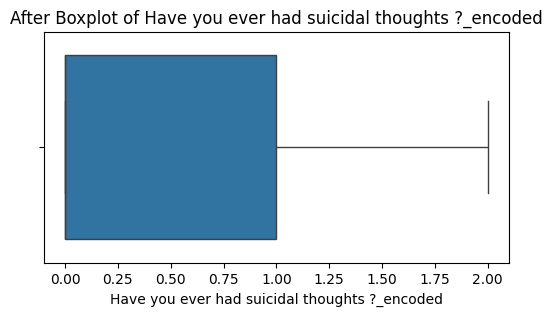

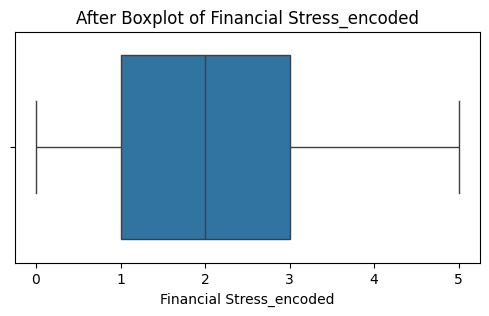

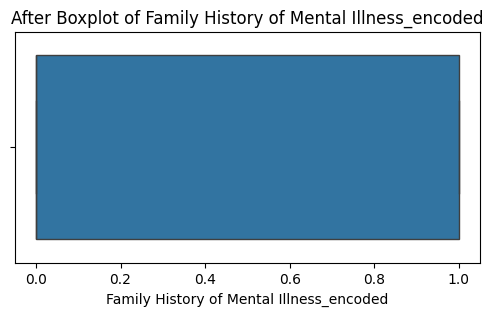

In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

def plot_boxplots(df, columns, title_prefix=""):
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(6, 3))
            sns.boxplot(x=df[col])
            plt.title(f'{title_prefix} Boxplot of {col}')
            plt.show()

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plot_boxplots(df, numeric_columns, title_prefix="Before")

df_clean = remove_outliers_iqr(df, numeric_columns)

plot_boxplots(df_clean, numeric_columns, title_prefix="After")

In [ ]:
X = df.drop("Depression", axis=1)
y = df["Depression"]
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

Label Encoder

In [ ]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [ ]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Gender: [0 1]
City: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]
Profession: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Dietary Habits: [0 1 2 3]
Degree: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Have you ever had suicidal thoughts ?: [1.         0.         0.63278254]
Family History of Mental Illness: [0 1]


In [ ]:
scaler = StandardScaler()
num_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
            'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Depression,Gender_encoded,City_encoded,Profession_encoded,Sleep Duration_encoded,Dietary Habits_encoded,Degree_encoded,Have you ever had suicidal thoughts ?_encoded,Financial Stress_encoded,Family History of Mental Illness_encoded
0,2,0,1.463165,0,0,1.345948,0.0,0.893447,-0.693509,0,...,1,0,0,0,0,0,0,0,0,0
1,8,1,-0.371474,1,0,-0.826483,0.0,-1.194093,1.510676,0,...,0,1,1,0,0,1,1,1,1,1
2,26,0,1.055467,2,0,-0.102340,0.0,-0.425715,1.510676,0,...,0,0,2,0,1,0,2,1,0,1
3,30,1,0.443921,3,0,-0.102340,0.0,-1.404887,-0.693509,0,...,1,1,3,0,2,1,3,2,2,1
4,32,1,-0.167625,4,0,0.621804,0.0,0.322264,0.041219,0,...,0,1,4,0,0,1,4,0,0,0


In [ ]:
df[num_cols].describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress
count,2.790100e+04,2.790100e+04,2.790100e+04,2.790100e+04,2.790100e+04,2.790100e+04,2.790100e+04
mean,1.739367e-16,1.426128e-17,8.149302e-17,3.488920e-17,2.139192e-17,1.165096e-16,7.741837e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.594566e+00,-2.274771e+00,-5.205978e+00,-2.162966e+00,-1.389445e+00,-1.930894e+00,-1.488955e+00
25%,-9.830196e-01,-8.264833e-01,-9.289004e-01,-6.935092e-01,-4.486379e-01,-8.516257e-01,-7.931217e-01
50%,-1.676248e-01,-1.023396e-01,7.747077e-02,4.121916e-02,-4.486379e-01,2.276428e-01,-9.728800e-02
75%,8.516186e-01,6.218041e-01,8.594483e-01,7.759475e-01,4.921697e-01,7.672770e-01,5.985457e-01
max,6.763230e+00,1.345948e+00,1.593827e+00,1.510676e+00,2.373785e+00,1.306911e+00,1.294379e+00


#Model Building

In [ ]:
le = LabelEncoder()
categorical_cols = ['Gender', 'City', 'Profession', 'Dietary Habits',
                    'Degree', 'Have you ever had suicidal thoughts ?',
                    'Family History of Mental Illness']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
# STEP 1: Define features and target
X = df.drop("Depression", axis=1)
y = df["Depression"]

# STEP 2: Encode categorical columns
from sklearn.preprocessing import LabelEncoder
cat_cols = X.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# STEP 3: Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 4: Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.84
Confusion Matrix:
[[1832  481]
 [ 393 2875]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581



#Random forest


In [222]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred)
print("RF Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Random Forest Accuracy: {acc_rf:.2f}")


RF Accuracy: 0.8362300662963627
Confusion Matrix:
[[1797  516]
 [ 398 2870]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Random Forest Accuracy: 0.84


#SVM

In [223]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.2f}")


SVM Accuracy: 0.8416054470524995
Confusion Matrix:
[[1785  528]
 [ 356 2912]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2313
           1       0.85      0.89      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

SVM Accuracy: 0.84


# K-Nearest Neighbors (KNN)

In [214]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
# Evaluation Metrics
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.2f}")




KNN Accuracy: 0.8064862927790718
Confusion Matrix:
[[1698  615]
 [ 465 2803]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2313
           1       0.82      0.86      0.84      3268

    accuracy                           0.81      5581
   macro avg       0.80      0.80      0.80      5581
weighted avg       0.81      0.81      0.81      5581

KNN Accuracy: 0.81


#XG-Boost

In [215]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("XG Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")


XG Accuracy: 0.8288837125963089
Confusion Matrix:
[[1799  514]
 [ 441 2827]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2313
           1       0.85      0.87      0.86      3268

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581

ROC AUC Score: 0.9077


#ROC

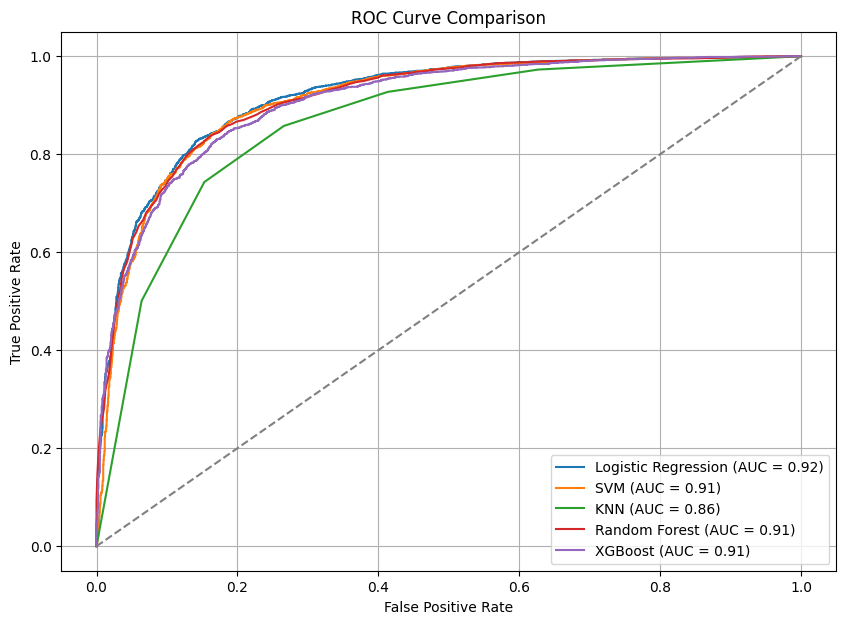

In [224]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities (positive class)
y_proba_log = log_model.predict_proba(X_test)[:, 1]
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_proba_rf  = rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Only if XGBoost is used

# Plot ROC curves
plt.figure(figsize=(10, 7))

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_log):.2f})")

# SVM
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc_score(y_test, y_proba_svm):.2f})")

# KNN
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc_score(y_test, y_proba_knn):.2f})")

# Random Forest
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})")

# XGBoost (if available)
try:
    fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
    plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})")
except:
    pass  # Skip if XGBoost model is not trained

# Diagonal line (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Final touches
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


#Joblib

In [225]:
pip install joblib